# Chapter 12: Hypothesis Testing

*Mathematics for Psychologists and Computation*

## Overview

This chapter covers the fundamental concepts of hypothesis testing in psychological research. We'll explore how researchers formulate and test hypotheses, understand p-values and significance levels, and learn about different statistical tests commonly used in psychology.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

# Set plotting parameters
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Introduction to Hypothesis Testing

Hypothesis testing is a fundamental statistical method used in psychological research to make inferences about populations based on sample data. It provides a systematic framework for deciding whether experimental results contain enough evidence to reject a null hypothesis.

### 1.1 The Logic of Hypothesis Testing

The process of hypothesis testing follows a logical structure:

1. **Formulate hypotheses**: Define the null hypothesis (H₀) and alternative hypothesis (H₁)
2. **Choose a significance level**: Typically α = 0.05
3. **Collect and analyze data**: Calculate the appropriate test statistic
4. **Determine the p-value**: The probability of obtaining the observed results (or more extreme) if H₀ is true
5. **Make a decision**: Reject or fail to reject the null hypothesis

Let's visualize this process:

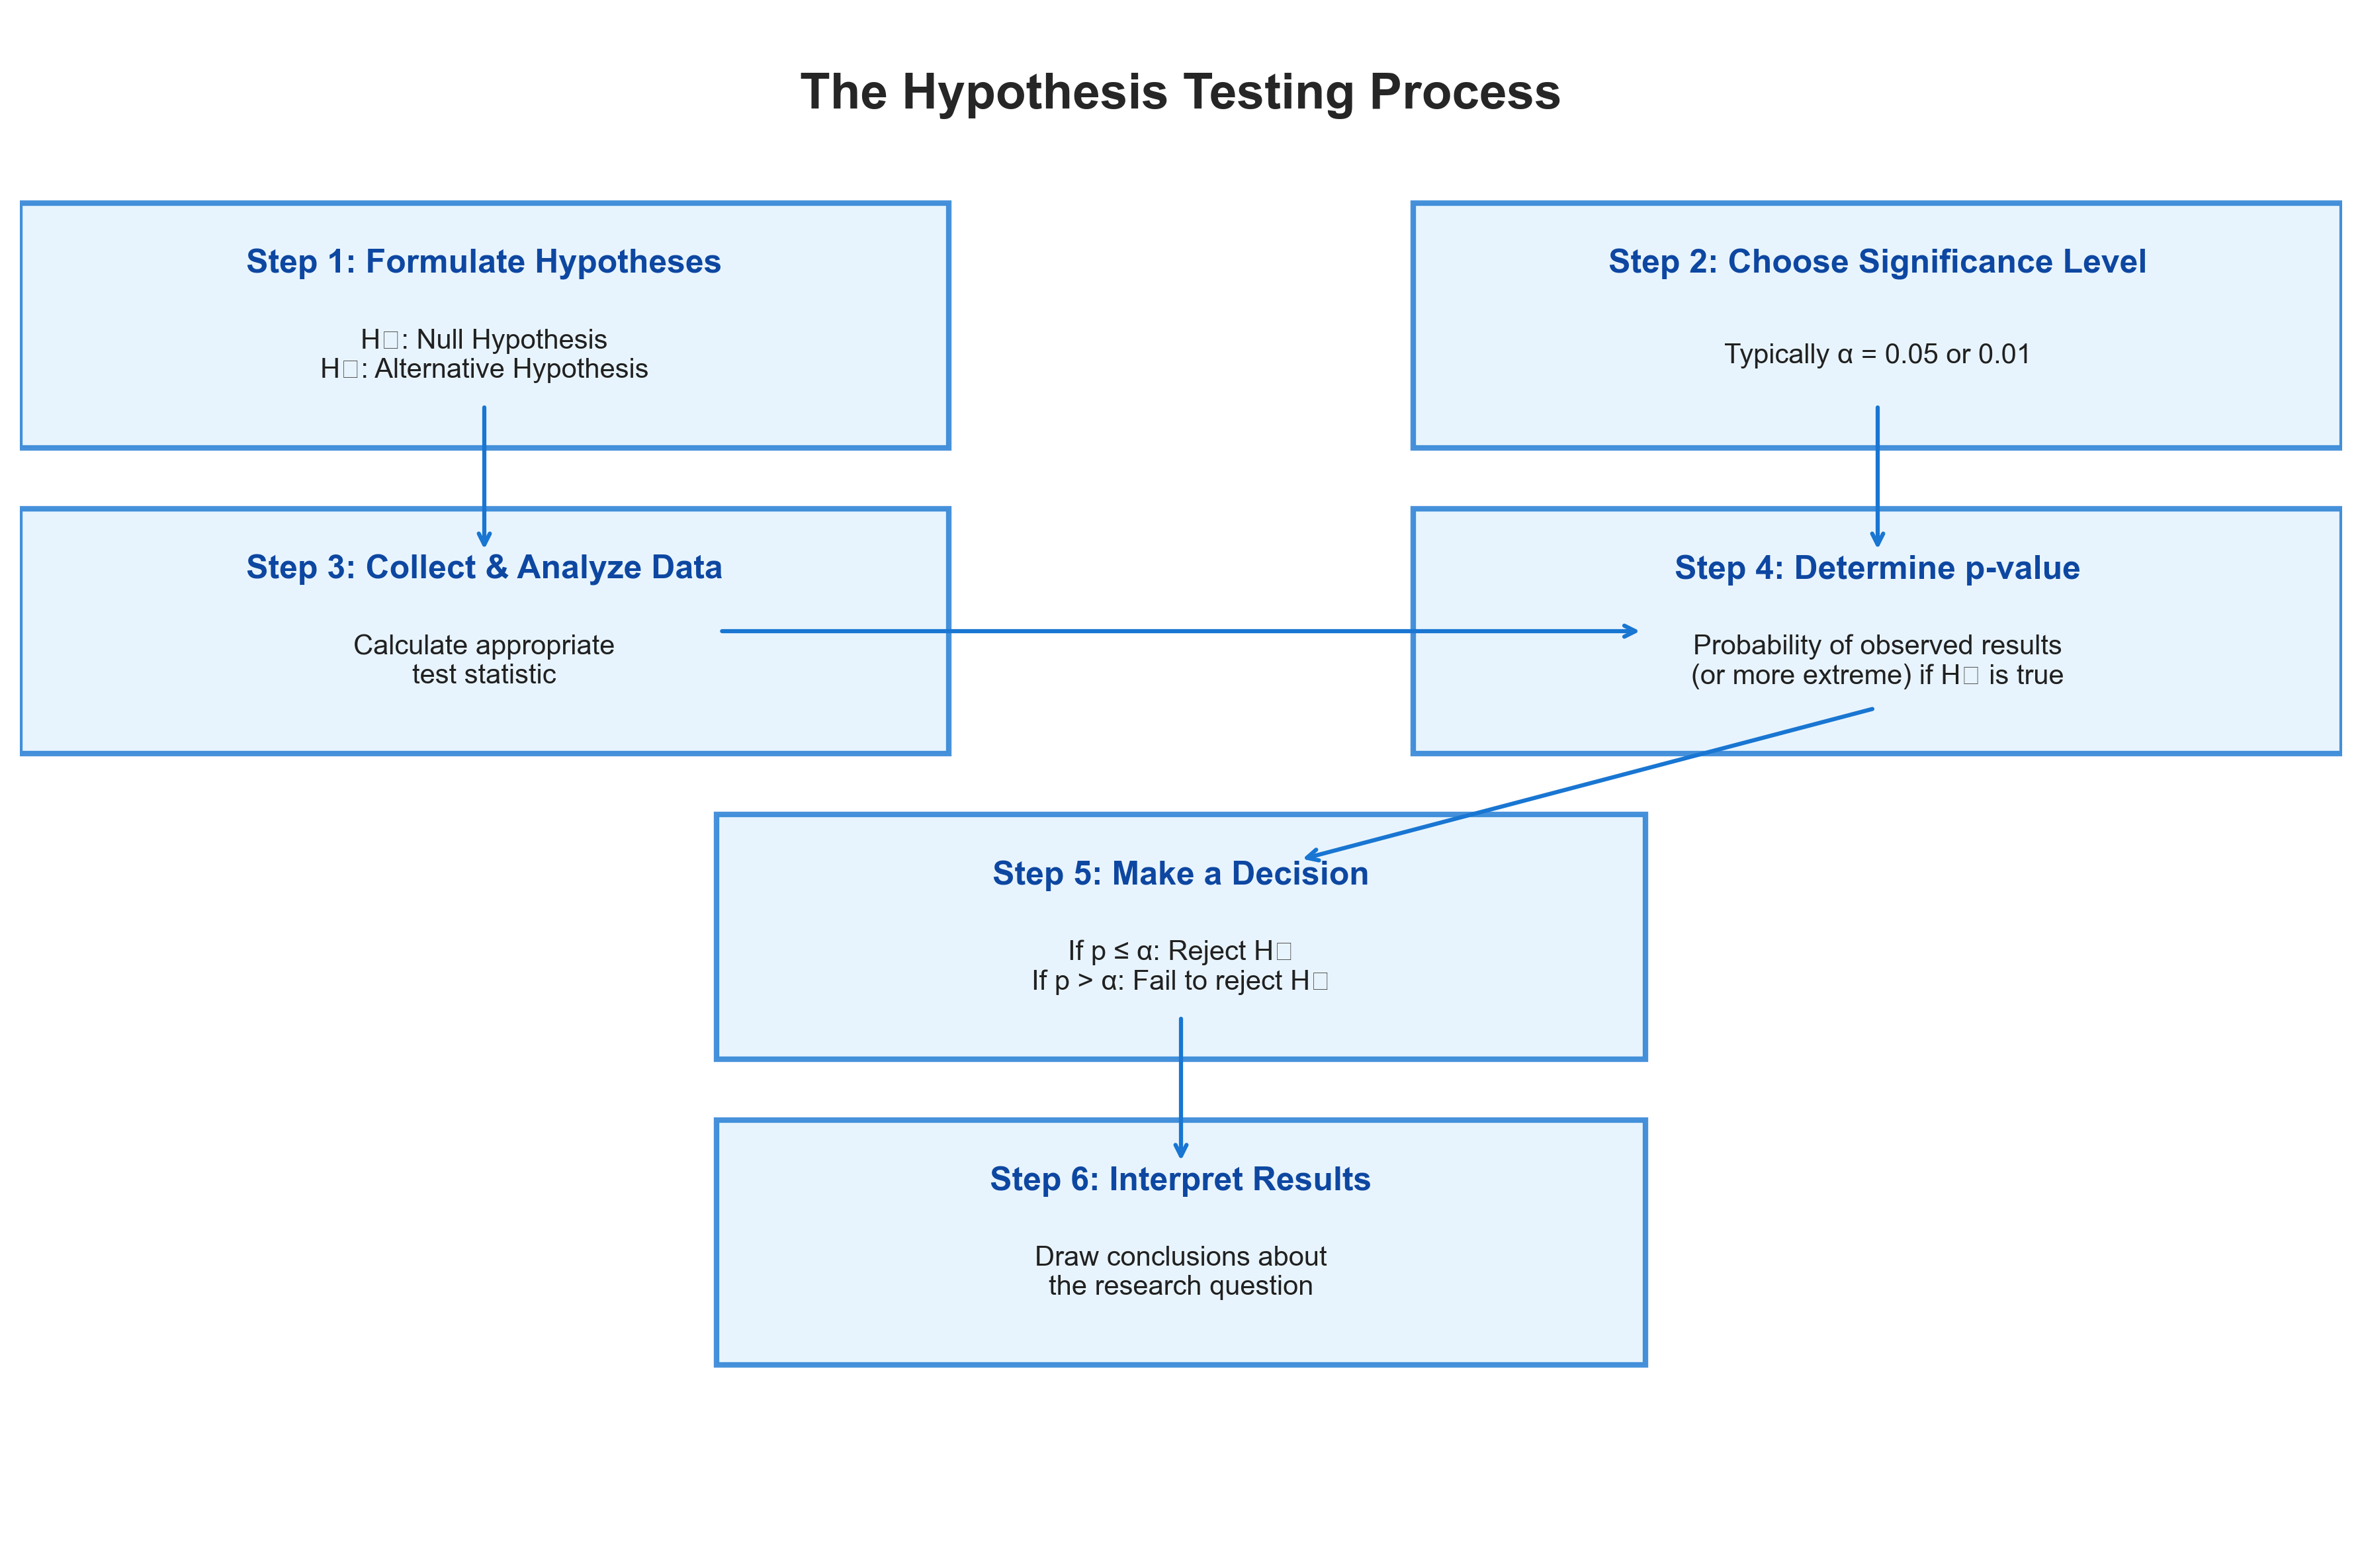

In [2]:
def hypothesis_testing_diagram():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Title
    ax.text(5, 9.5, 'The Hypothesis Testing Process', 
            ha='center', va='center', fontsize=18, fontweight='bold')
    
    # Draw boxes for the different steps
    steps = [
        (2, 8, 'Step 1: Formulate Hypotheses', 
         'H₀: Null Hypothesis\nH₁: Alternative Hypothesis'),
        (8, 8, 'Step 2: Choose Significance Level',
         'Typically α = 0.05 or 0.01'),
        (2, 6, 'Step 3: Collect & Analyze Data',
         'Calculate appropriate\ntest statistic'),
        (8, 6, 'Step 4: Determine p-value',
         'Probability of observed results\n(or more extreme) if H₀ is true'),
        (5, 4, 'Step 5: Make a Decision',
         'If p ≤ α: Reject H₀\nIf p > α: Fail to reject H₀'),
        (5, 2, 'Step 6: Interpret Results',
         'Draw conclusions about\nthe research question')
    ]
    
    # Add arrows connecting steps
    arrows = [
        (2, 7.5, 2, 6.5),  # Step 1 to 3
        (8, 7.5, 8, 6.5),  # Step 2 to 4
        (3, 6, 7, 6),      # Step 3 to 4
        (8, 5.5, 5.5, 4.5), # Step 4 to 5
        (5, 3.5, 5, 2.5)    # Step 5 to 6
    ]
    
    for x, y, title, desc in steps:
        # Draw box
        rect = plt.Rectangle((x-2, y-0.8), 4, 1.6, facecolor='#E3F2FD', 
                             edgecolor='#1976D2', alpha=0.8, linewidth=2)
        ax.add_patch(rect)
        
        # Add title and description
        ax.text(x, y+0.4, title, ha='center', va='center', 
                fontsize=12, fontweight='bold', color='#0D47A1')
        ax.text(x, y-0.2, desc, ha='center', va='center', 
                fontsize=10, color='#212121')
    
    # Add arrows
    for x1, y1, x2, y2 in arrows:
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                   arrowprops=dict(arrowstyle='->', lw=1.5, color='#1976D2'))
    
    plt.tight_layout()
    plt.show()

# Display the diagram
hypothesis_testing_diagram()

### 1.2 Null and Alternative Hypotheses

The **null hypothesis (H₀)** typically represents the status quo or the absence of an effect. It's what we assume to be true until evidence suggests otherwise.

The **alternative hypothesis (H₁)** represents what we're testing for - usually the presence of an effect or relationship.

Examples in psychological research:

| Research Question | Null Hypothesis (H₀) | Alternative Hypothesis (H₁) |
|-------------------|----------------------|-----------------------------|
| Does mindfulness meditation reduce anxiety? | Mindfulness has no effect on anxiety levels | Mindfulness reduces anxiety levels |
| Is there a gender difference in spatial ability? | There is no difference in spatial ability between genders | There is a difference in spatial ability between genders |
| Does sleep deprivation impair memory? | Sleep deprivation has no effect on memory performance | Sleep deprivation impairs memory performance |

### 1.3 Types of Errors in Hypothesis Testing

When making decisions based on hypothesis tests, two types of errors can occur:

- **Type I Error (False Positive)**: Rejecting a true null hypothesis (concluding there is an effect when there isn't)
- **Type II Error (False Negative)**: Failing to reject a false null hypothesis (concluding there is no effect when there is)

Let's visualize these errors:

In [3]:
def error_types_diagram():
    # Create a larger figure focusing on height to improve text alignment
    fig, ax = plt.subplots(figsize=(18, 12))  # Increase height by ~20%
    ax.axis('off')
    
    # Define the table structure
    table_data = [
        ['', 'H₀ is True', 'H₀ is False'],
        ['Reject H₀', 'Type I Error\n(False Positive)\nα',
         'Correct Decision\n(True Positive)\nPower = 1 - β'],
        ['Fail to Reject H₀', 'Correct Decision\n(True Negative)\n1 - α',
         'Type II Error\n(False Negative)\nβ']
    ]
    
    # Define cell colors
    cell_colors = [
        ['#FFFFFF', '#E8F5E9', '#E8F5E9'],
        ['#E3F2FD', '#FFCDD2', '#C8E6C9'],
        ['#E3F2FD', '#C8E6C9', '#FFCDD2']
    ]
    
    # Create the table
    table = ax.table(cellText=table_data, cellColours=cell_colors,
                     loc='center', cellLoc='center')

    # Adjust styling for better alignment
    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(2, 5.4)  # Further increase vertical scale

    # Add title
    plt.suptitle('Types of Errors in Hypothesis Testing', fontsize=20, y=0.97)
    
    # Explanatory text
    fig.text(0.5, 0.015,
             'α = significance level (probability of Type I error)     '
             'β = probability of Type II error     '
             'Power = probability of correctly rejecting a false null hypothesis',
             ha='center', fontsize=16)

    plt.subplots_adjust(top=0.9, bottom=0.08)
    plt.show()

# Render the vertically expanded table
error_types_diagram()

## 2. Understanding p-values and Significance Levels

### 2.1 What is a p-value?

A **p-value** is the probability of obtaining results at least as extreme as those observed, assuming the null hypothesis is true. It quantifies the strength of evidence against the null hypothesis.

- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis
- A large p-value indicates weak evidence against the null hypothesis

### 2.2 Significance Level (α)

The **significance level (α)** is a threshold value that determines when to reject the null hypothesis. It represents the probability of making a Type I error.

Common significance levels in psychology:
- α = 0.05 (5% chance of Type I error)
- α = 0.01 (1% chance of Type I error)
- α = 0.001 (0.1% chance of Type I error)

Let's visualize how p-values relate to the normal distribution:

In [4]:
def p_value_visualization():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Generate x values for normal distribution
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    
    # Plot 1: Two-tailed test
    ax1.plot(x, y, 'b-', lw=2)
    ax1.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='r', alpha=0.3)
    
    # Add vertical lines for critical values
    ax1.axvline(-1.96, color='r', linestyle='--', alpha=0.7)
    ax1.axvline(1.96, color='r', linestyle='--', alpha=0.7)
    
    # Add labels and title
    ax1.set_title('Two-Tailed Test (α = 0.05)', fontsize=14)
    ax1.set_xlabel('z-score', fontsize=12)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.text(-2.5, 0.05, 'p/2 = 0.025', color='r', fontsize=12)
    ax1.text(2.5, 0.05, 'p/2 = 0.025', color='r', fontsize=12)
    ax1.text(0, 0.2, 'Fail to Reject H₀', ha='center', fontsize=12)
    
    # Plot 2: One-tailed test
    ax2.plot(x, y, 'b-', lw=2)
    ax2.fill_between(x, y, where=(x >= 1.645), color='r', alpha=0.3)
    
    # Add vertical line for critical value
    ax2.axvline(1.645, color='r', linestyle='--', alpha=0.7)
    
    # Add labels and title
    ax2.set_title('One-Tailed Test (α = 0.05)', fontsize=14)
    ax2.set_xlabel('z-score', fontsize=12)
    ax2.set_ylabel('Probability Density', fontsize=12)
    ax2.text(2.5, 0.05, 'p = 0.05', color='r', fontsize=12)
    ax2.text(0, 0.2, 'Fail to Reject H₀', ha='center', fontsize=12)
    ax2.text(2.5, 0.2, 'Reject H₀', ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Display the visualization
p_value_visualization()

### 2.3 One-tailed vs. Two-tailed Tests

The choice between one-tailed and two-tailed tests depends on the research hypothesis:

- **Two-tailed test**: Used when the alternative hypothesis predicts a difference in either direction
  - H₁: μ ≠ μ₀
  - Critical regions in both tails of the distribution
  
- **One-tailed test**: Used when the alternative hypothesis predicts a difference in a specific direction
  - H₁: μ > μ₀ (right-tailed) or H₁: μ < μ₀ (left-tailed)
  - Critical region in only one tail of the distribution

### 2.4 Common Misconceptions about p-values

It's important to understand what p-values do and don't tell us:

- A p-value is **not** the probability that the null hypothesis is true
- A p-value is **not** the probability that the alternative hypothesis is true
- A p-value is **not** the probability that the results occurred by chance
- A p-value does **not** measure the size or importance of an effect

A p-value simply tells us how compatible our data is with the null hypothesis.

## 3. Common Statistical Tests in Psychology

Psychologists use various statistical tests depending on their research questions and data characteristics. Let's explore some of the most common tests:

In [5]:
# Create a table of common statistical tests
tests_data = {
    'Test': ['t-test (Independent Samples)', 't-test (Paired Samples)', 'One-way ANOVA', 
             'Repeated Measures ANOVA', 'Pearson Correlation', 'Chi-Square Test', 
             'Mann-Whitney U Test', 'Wilcoxon Signed-Rank Test'],
    'Purpose': ['Compare means between two independent groups', 
                'Compare means between paired observations', 
                'Compare means across three or more independent groups',
                'Compare means across three or more related conditions',
                'Assess linear relationship between two continuous variables',
                'Analyze relationship between categorical variables',
                'Non-parametric alternative to independent t-test',
                'Non-parametric alternative to paired t-test'],
    'Example Research Question': ['Do men and women differ in anxiety scores?',
                                 'Does therapy reduce depression scores from pre to post-treatment?',
                                 'Do three different teaching methods affect learning outcomes differently?',
                                 'Does memory performance differ across three recall conditions?',
                                 'Is there a relationship between hours studied and exam performance?',
                                 'Is political affiliation related to attitudes toward climate change?',
                                 'Do meditation practitioners have different stress levels than non-practitioners?',
                                 'Does a mindfulness intervention change attention scores?'],
    'Assumptions': ['Normality, homogeneity of variance, independence',
                   'Normality of differences, independence of pairs',
                   'Normality, homogeneity of variance, independence',
                   'Sphericity, normality, independence of observations',
                   'Linearity, normality, homoscedasticity',
                   'Expected frequencies ≥ 5, independence',
                   'Ordinal or continuous data, independence',
                   'Symmetric distribution of differences']
}

tests_df = pd.DataFrame(tests_data)

# Style and display the table
styled_tests = tests_df.style.set_properties(**{
    'text-align': 'left',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Common Statistical Tests in Psychological Research')

display(styled_tests)

### 3.1 t-tests

The t-test is one of the most commonly used statistical tests in psychology. It compares means between groups or conditions.

Let's simulate data for an independent samples t-test comparing anxiety scores between two groups:

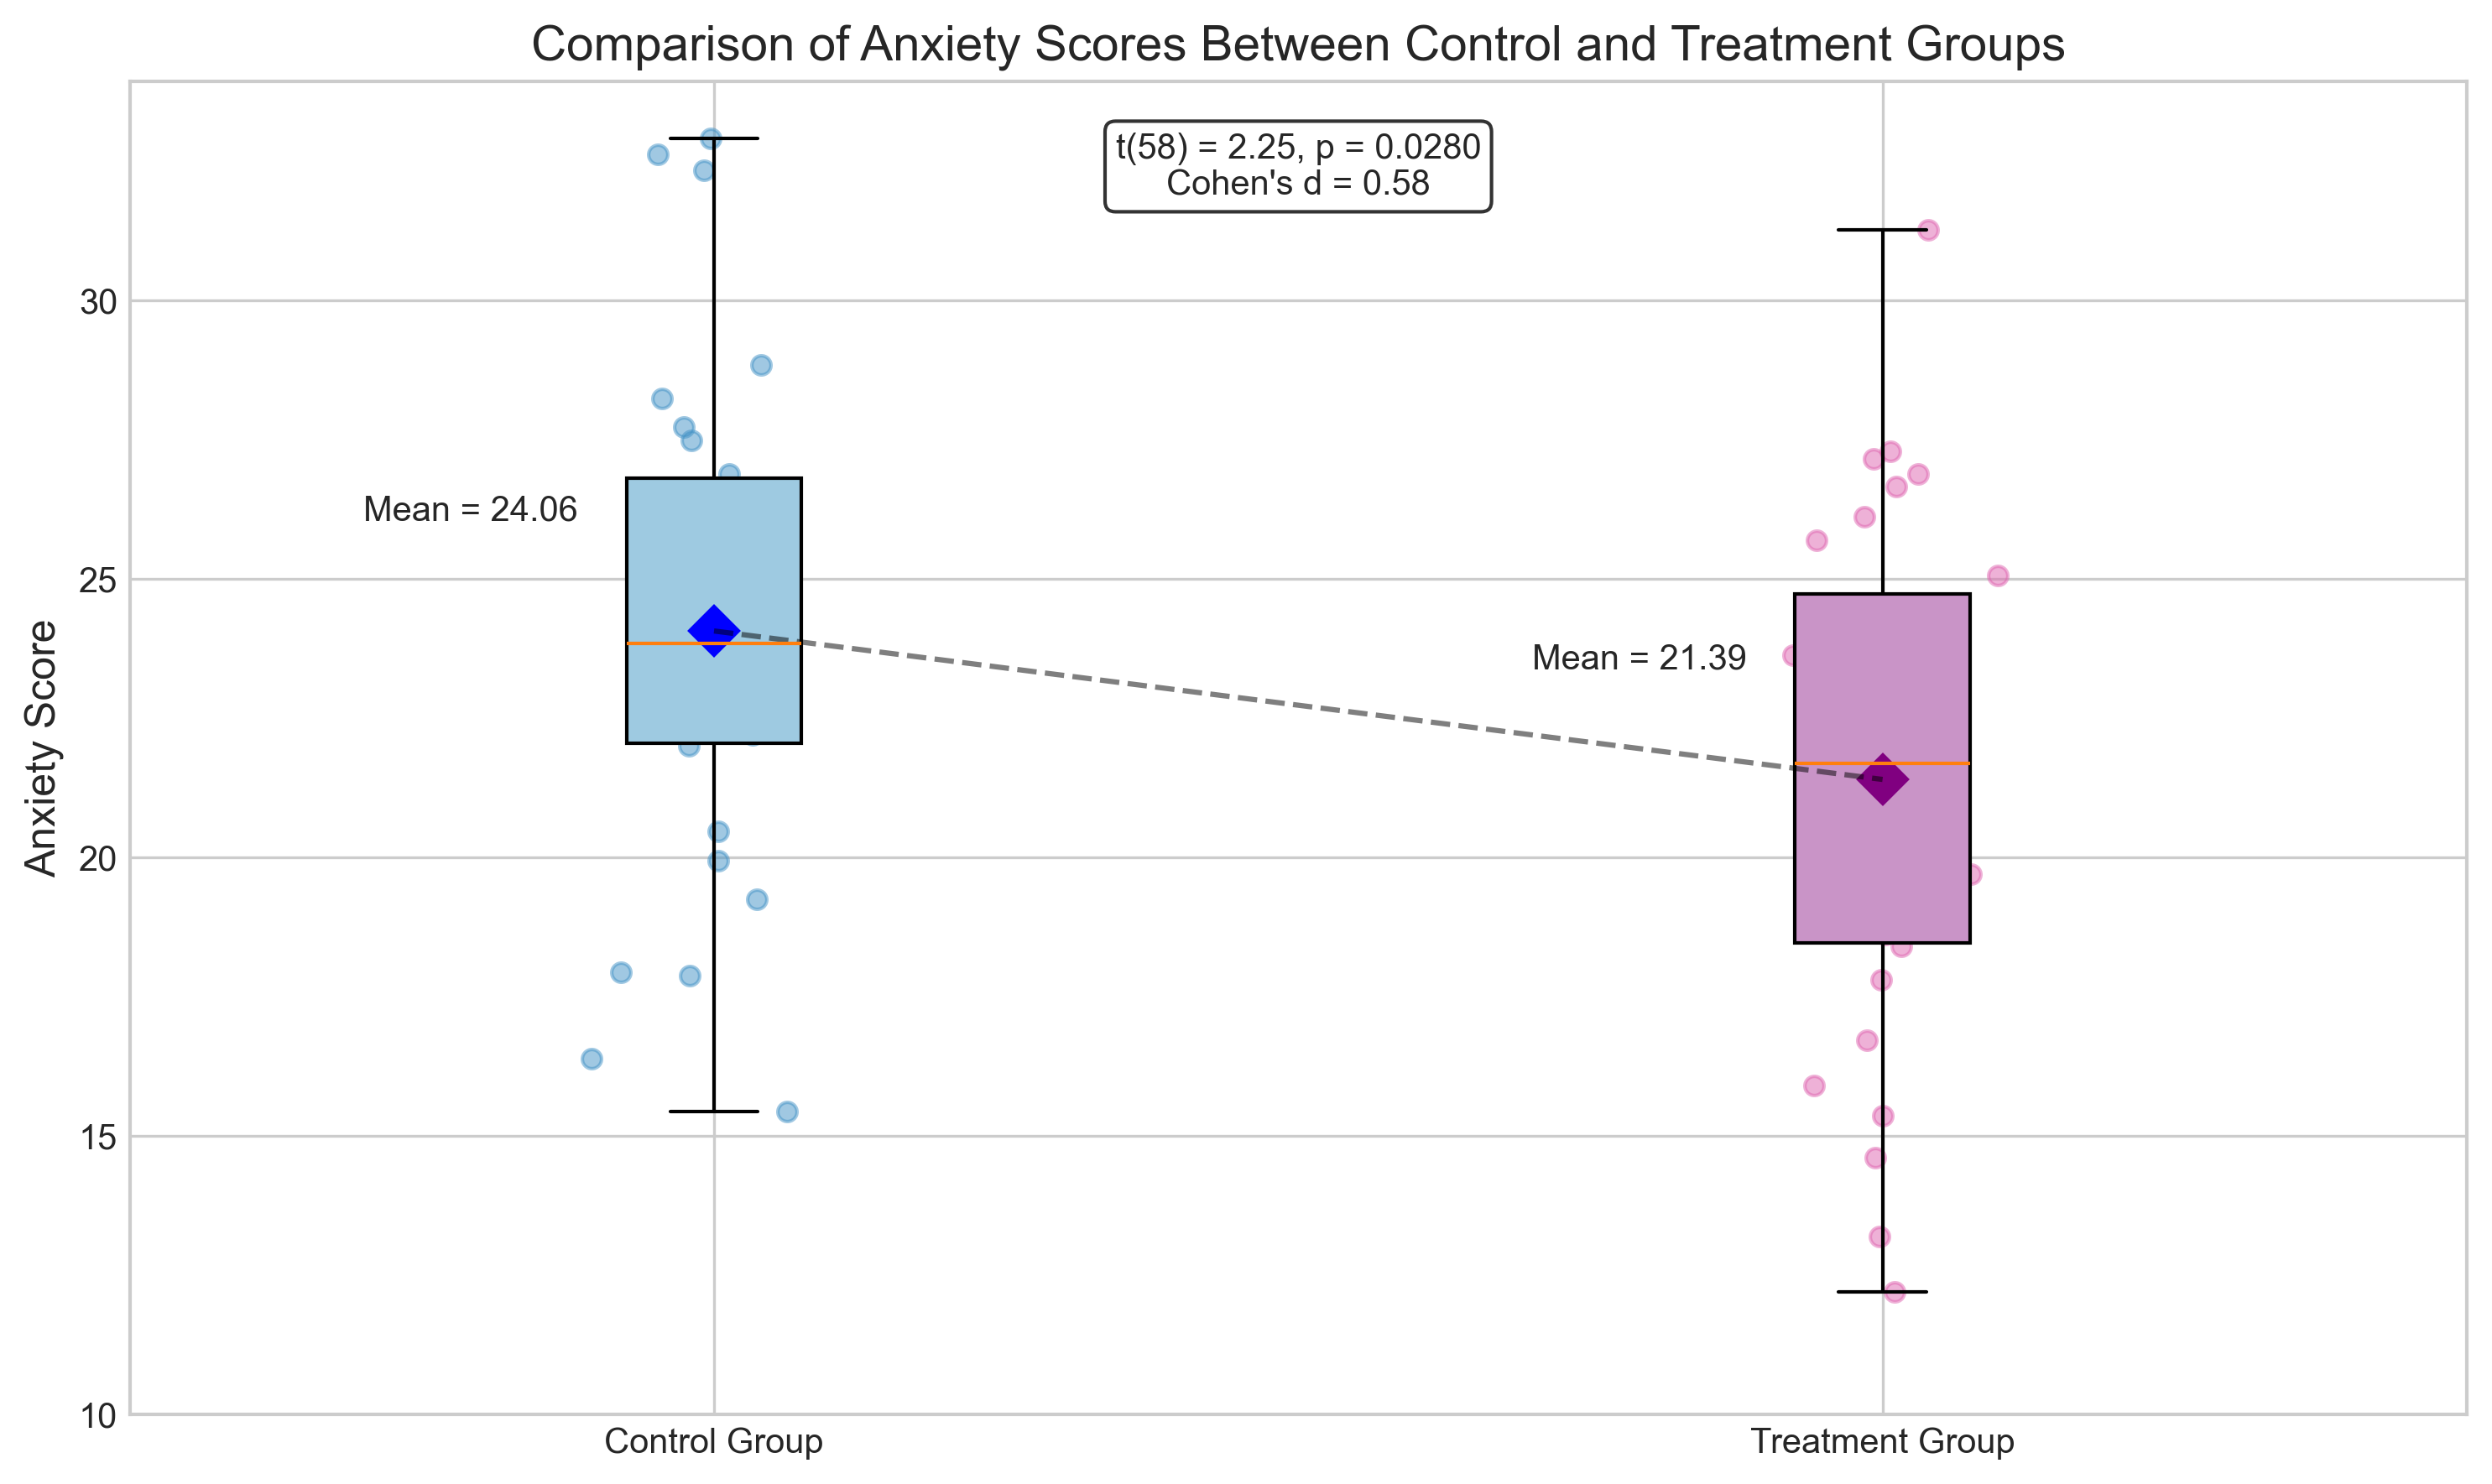

Independent Samples t-test Results:
t-statistic: 2.2544
p-value: 0.0280
Cohen's d: 0.5821
Interpretation: Reject the null hypothesis at α = 0.05


In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate anxiety scores for two groups
control_group = np.random.normal(25, 5, 30)  # Mean = 25, SD = 5, n = 30
treatment_group = np.random.normal(22, 5, 30)  # Mean = 22, SD = 5, n = 30

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(control_group, treatment_group)

# Calculate effect size (Cohen's d)
def cohens_d(group1, group2):
    # Pooled standard deviation
    s = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + 
                 (len(group2) - 1) * np.var(group2, ddof=1)) / 
                (len(group1) + len(group2) - 2))
    # Cohen's d
    return (np.mean(group1) - np.mean(group2)) / s

effect_size = cohens_d(control_group, treatment_group)

# Visualize the data
plt.figure(figsize=(10, 6))

# Create boxplots
box = plt.boxplot([control_group, treatment_group], 
                  labels=['Control Group', 'Treatment Group'],
                  patch_artist=True)

# Color the boxes
box['boxes'][0].set_facecolor('#9ecae1')
box['boxes'][1].set_facecolor('#c994c7')

# Add individual data points (jittered)
for i, data in enumerate([control_group, treatment_group]):
    # Add jitter to x-position
    x = np.random.normal(i+1, 0.04, size=len(data))
    plt.scatter(x, data, alpha=0.5, s=30, 
                color=['#4292c6', '#df65b0'][i])

# Add means as diamonds
plt.plot(1, np.mean(control_group), 'D', color='blue', markersize=10)
plt.plot(2, np.mean(treatment_group), 'D', color='purple', markersize=10)

# Add horizontal line connecting means
plt.plot([1, 2], [np.mean(control_group), np.mean(treatment_group)], 'k--', alpha=0.5)

# Add annotations
plt.annotate(f'Mean = {np.mean(control_group):.2f}', 
             xy=(1, np.mean(control_group)), 
             xytext=(0.7, np.mean(control_group)+2),
             fontsize=10)
plt.annotate(f'Mean = {np.mean(treatment_group):.2f}', 
             xy=(2, np.mean(treatment_group)), 
             xytext=(1.7, np.mean(treatment_group)+2),
             fontsize=10)

# Add t-test results
plt.text(1.5, np.max([np.max(control_group), np.max(treatment_group)]) - 0.5,
         f't({len(control_group) + len(treatment_group) - 2}) = {t_stat:.2f}, p = {p_value:.4f}\nCohen\'s d = {effect_size:.2f}',
         ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add title and labels
plt.title('Comparison of Anxiety Scores Between Control and Treatment Groups', fontsize=14)
plt.ylabel('Anxiety Score', fontsize=12)
plt.ylim(bottom=10)

plt.tight_layout()
plt.show()

# Print the results
print(f"Independent Samples t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Cohen's d: {effect_size:.4f}")
print(f"Interpretation: {'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")

Now let's simulate data for a paired samples t-test, which might be used to compare pre-test and post-test scores:

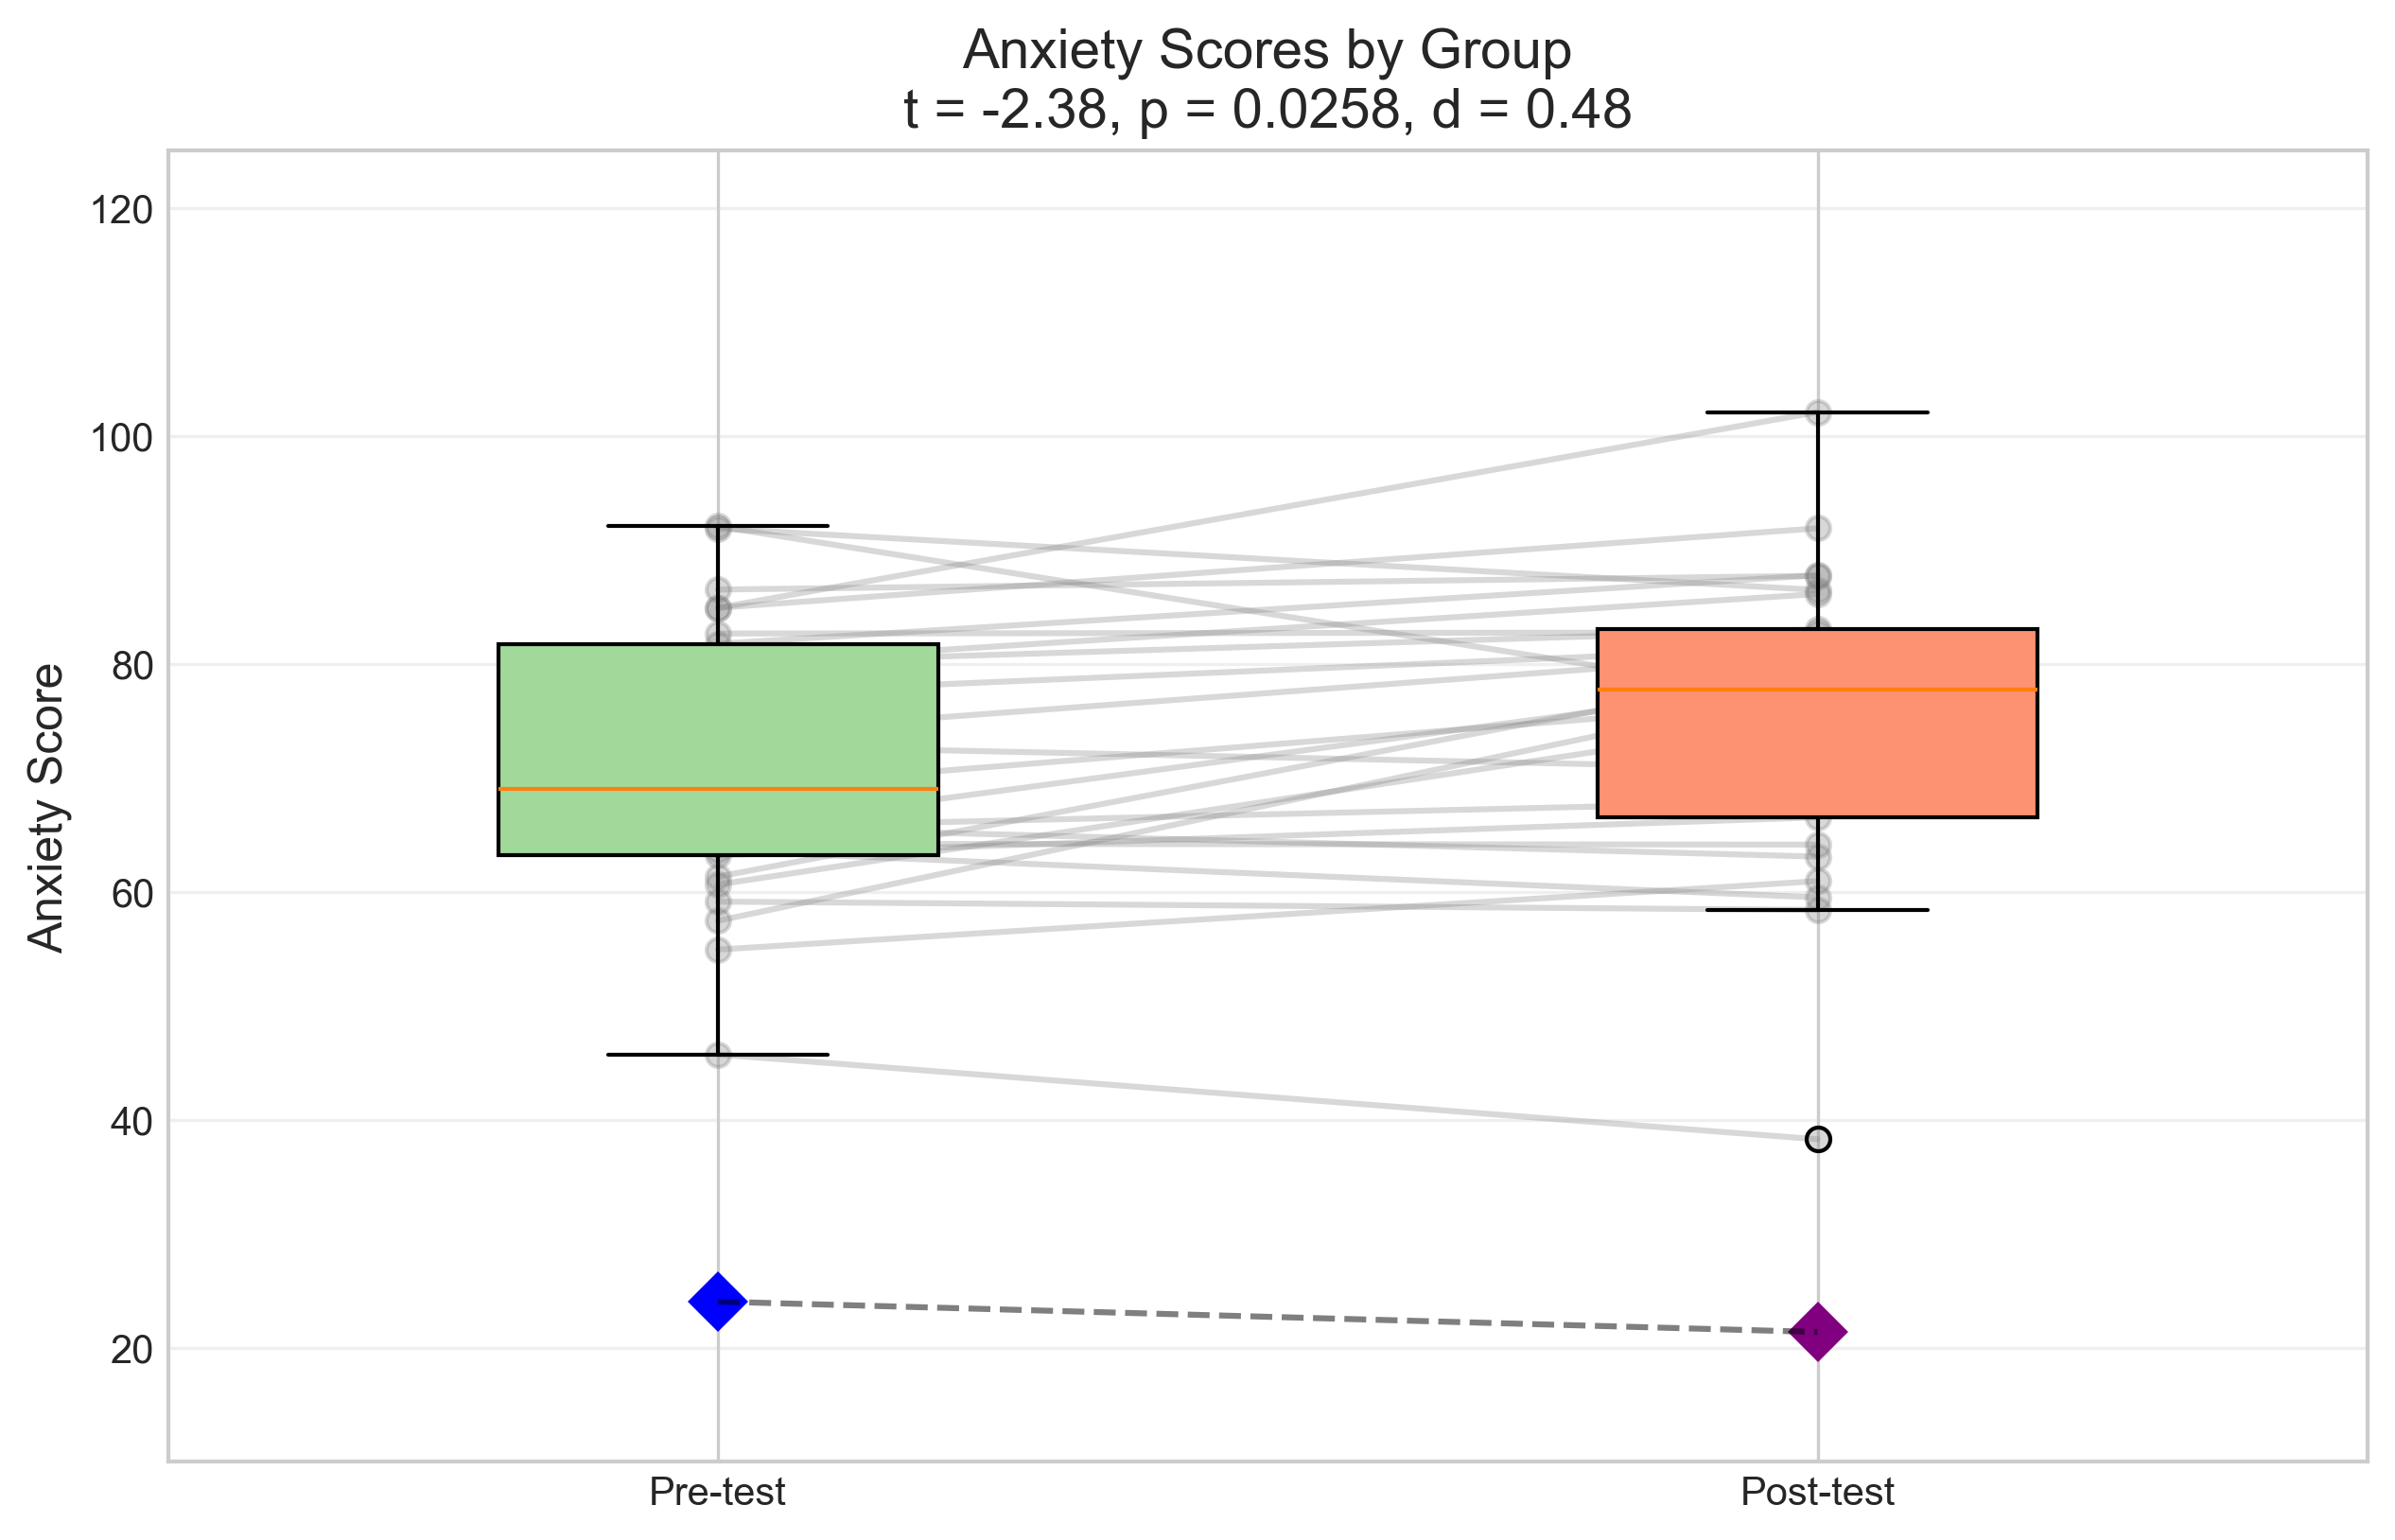

Independent Samples t-test Results:
t-statistic: -2.3760
p-value: 0.0258
Effect size (Cohen's d): 0.4752
Mean difference: 2.67

Interpretation: Reject the null hypothesis at α = 0.05


In [7]:
# Simulate pre-test and post-test scores
np.random.seed(123)
n = 25  # Sample size

# Generate correlated pre-test and post-test scores
# First, generate random scores for pre-test
pre_test = np.random.normal(70, 10, n)

# Generate post-test scores that are correlated with pre-test scores
# and have a mean improvement of 5 points
correlation = 0.7
improvement = 5
noise = np.random.normal(0, 8, n)
post_test = pre_test * correlation + (1 - correlation) * np.random.normal(70, 10, n) + improvement + noise

# Perform paired samples t-test
t_stat, p_value = stats.ttest_rel(pre_test, post_test)

# Calculate effect size (Cohen's d for paired samples)
def cohens_d_paired(x, y):
    d = y - x  # Differences
    return np.mean(d) / np.std(d, ddof=1)

effect_size = cohens_d_paired(pre_test, post_test)

# Visualize the data
plt.figure(figsize=(10, 6))

# Plot individual participant data with lines connecting pre and post
for i in range(n):
    plt.plot([1, 2], [pre_test[i], post_test[i]], 'o-', color='gray', alpha=0.3)

# Add boxplots
box = plt.boxplot([pre_test, post_test], positions=[1, 2], 
                  labels=['Pre-test', 'Post-test'],
                  patch_artist=True, widths=0.4)

# Color the boxes
box['boxes'][0].set_facecolor('#a1d99b')
box['boxes'][1].set_facecolor('#fc9272')

# Add means as diamonds
plt.plot(1, np.mean(control_group), 'D', color='blue', markersize=10)
plt.plot(2, np.mean(treatment_group), 'D', color='purple', markersize=10)

# Add a line connecting means
plt.plot([1, 2], [np.mean(control_group), np.mean(treatment_group)], 'k--', alpha=0.5)

# Add annotations
plt.title(f'Anxiety Scores by Group\nt = {t_stat:.2f}, p = {p_value:.4f}, d = {effect_size:.2f}', fontsize=14)
plt.ylabel('Anxiety Score', fontsize=12)
plt.ylim(10, 125)
plt.grid(axis='y', alpha=0.3)

plt.show()

# Print the results
print(f"Independent Samples t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Effect size (Cohen's d): {effect_size:.4f}")
print(f"Mean difference: {np.mean(control_group) - np.mean(treatment_group):.2f}")
print(f"\nInterpretation: {'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")

Now let's simulate data for a paired samples t-test, which might be used in a pre-post design:

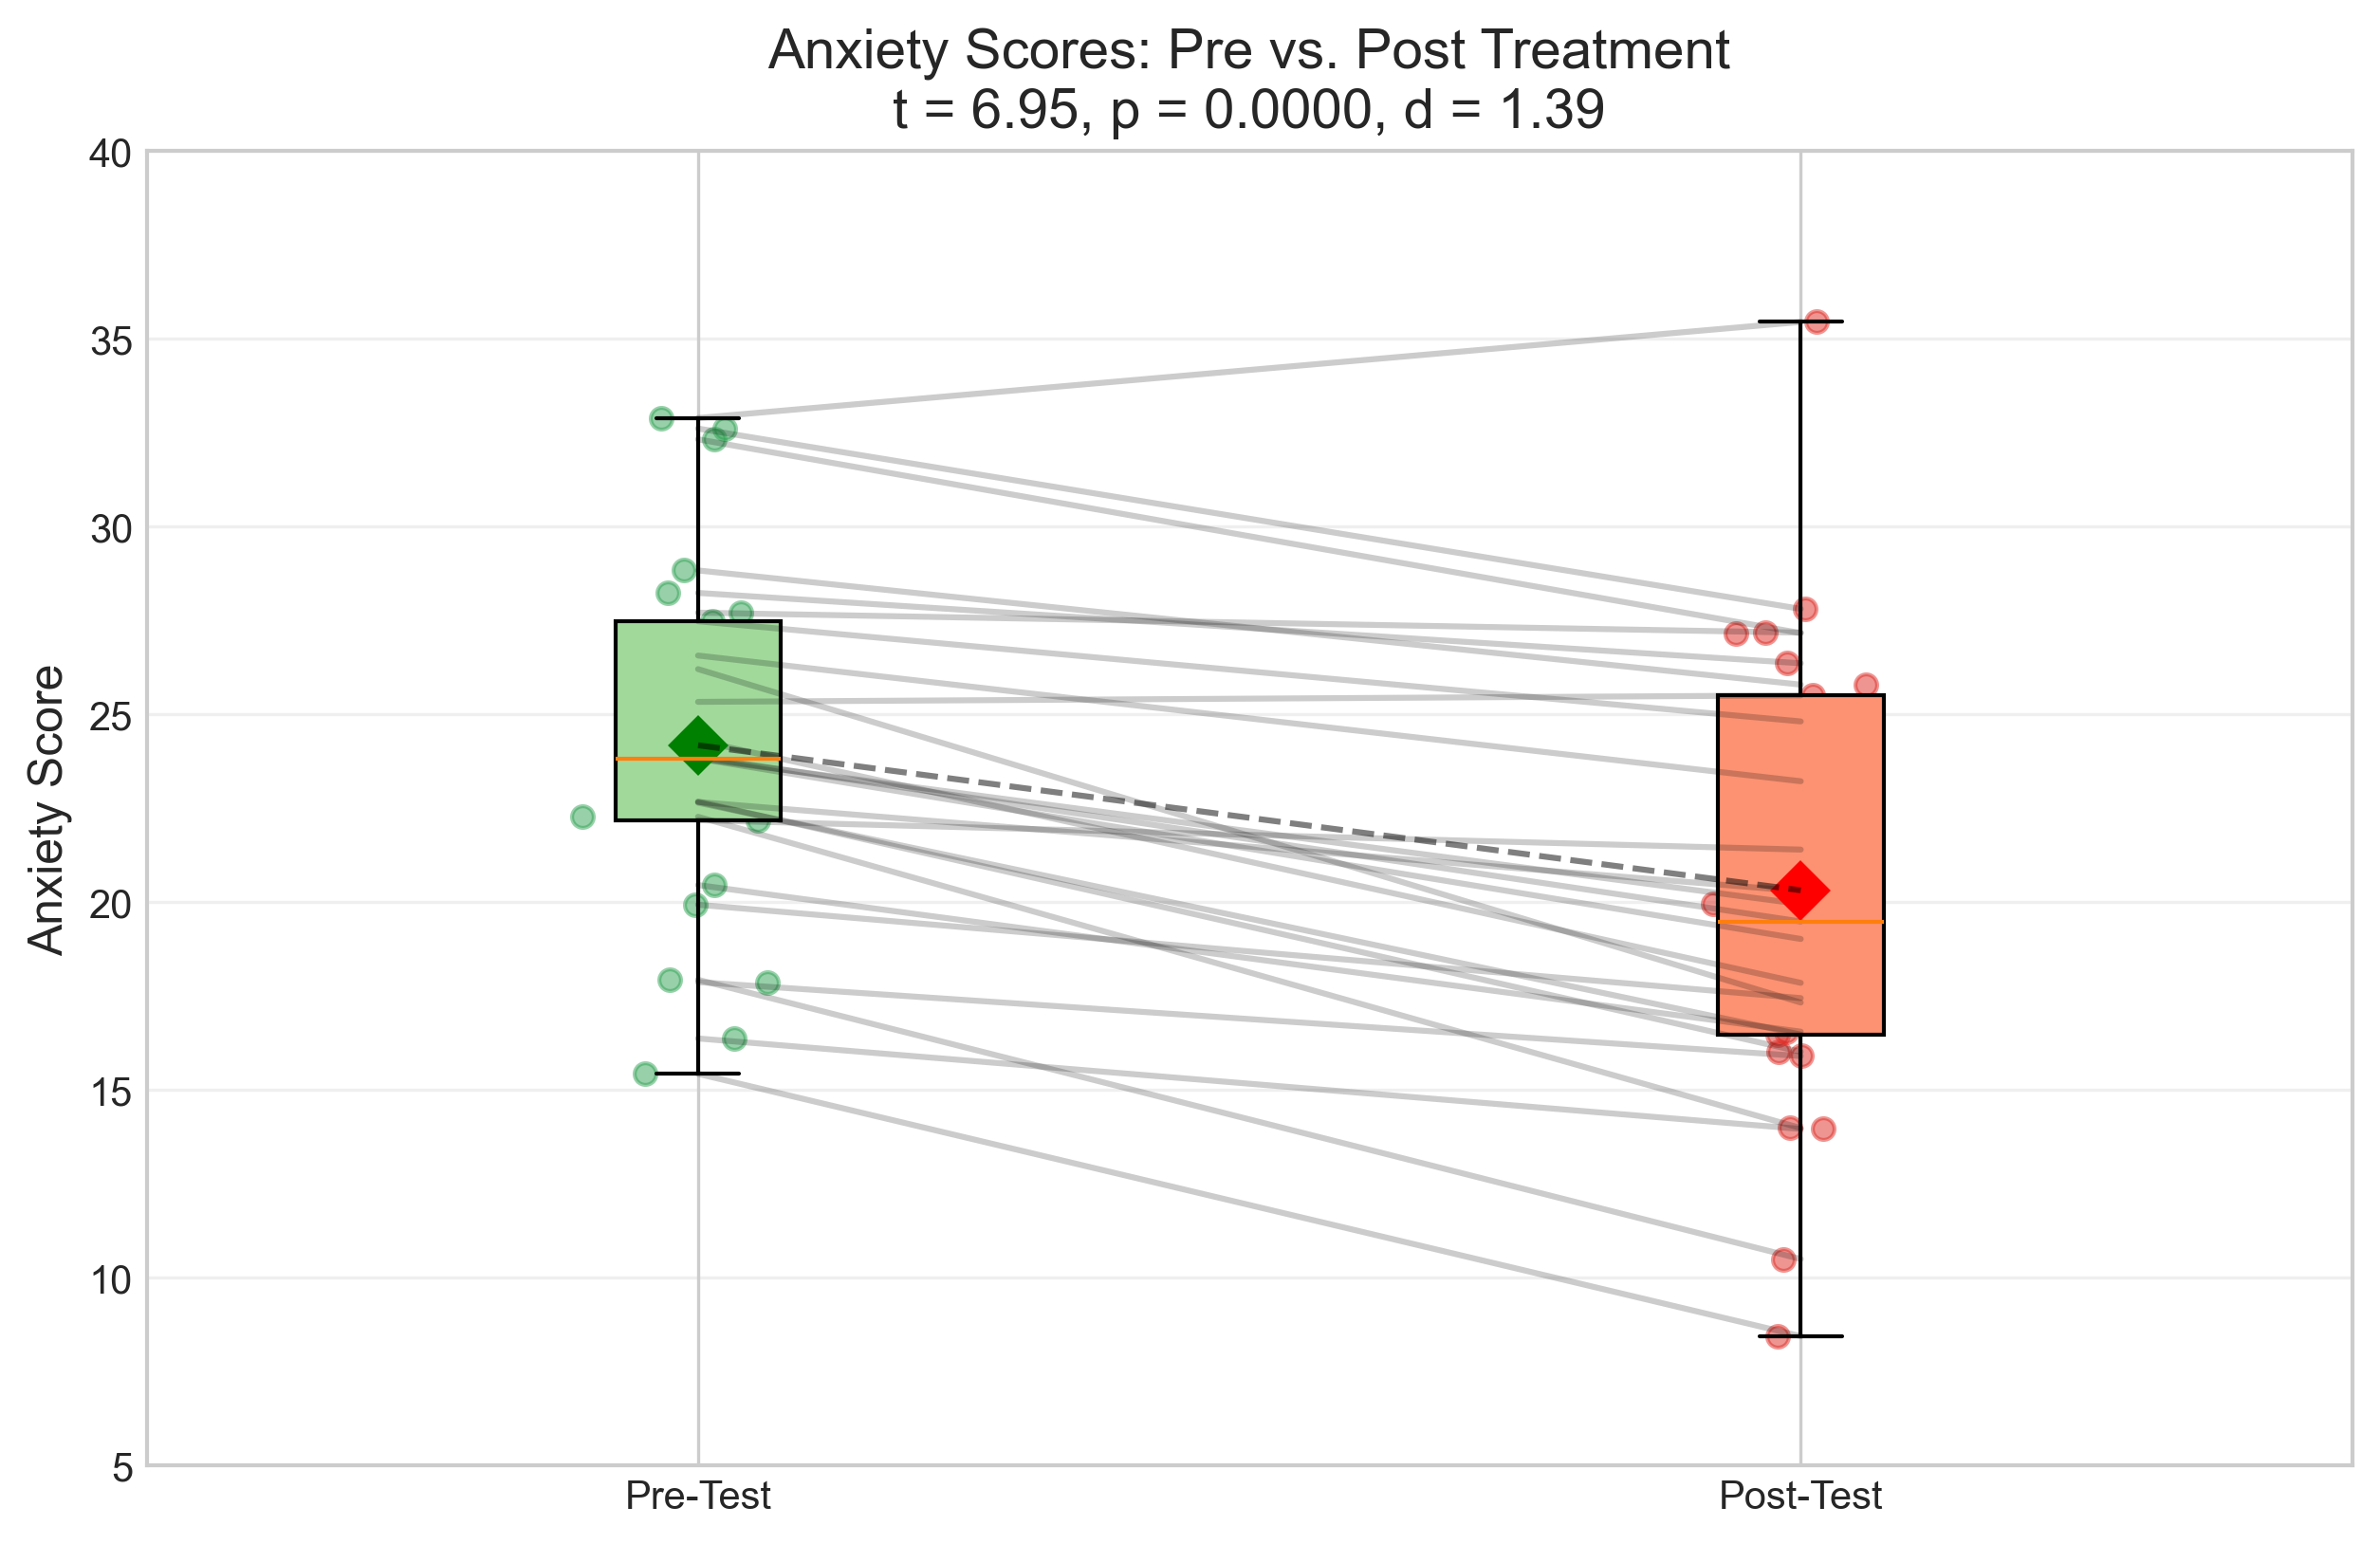

Paired Samples t-test Results:
t-statistic: 6.9543
p-value: 0.0000
Effect size (Cohen's d): 1.3909
Mean difference: 3.86

Interpretation: Reject the null hypothesis at α = 0.05


In [8]:
# Simulate pre-post anxiety scores
np.random.seed(42)
n = 25  # Sample size

# Generate baseline scores
pre_test = np.random.normal(25, 5, n)  # Mean = 25, SD = 5

# Generate post-test scores (correlated with pre-test, but with lower mean)
# We'll create a correlation by adding noise to the pre-test scores
noise = np.random.normal(0, 3, n)  # Random noise
post_test = pre_test - 3 + noise  # Mean reduction of 3 points plus noise

# Perform paired samples t-test
t_stat_paired, p_value_paired = stats.ttest_rel(pre_test, post_test)

# Calculate effect size (Cohen's d for paired samples)
def cohens_d_paired(x1, x2):
    # Calculate the differences
    d = x1 - x2
    # Cohen's d = mean difference / standard deviation of differences
    return np.mean(d) / np.std(d, ddof=1)

effect_size_paired = cohens_d_paired(pre_test, post_test)

# Visualize the data
plt.figure(figsize=(10, 6))

# Create boxplots
box = plt.boxplot([pre_test, post_test], 
                  labels=['Pre-Test', 'Post-Test'],
                  patch_artist=True)

# Color the boxes
box['boxes'][0].set_facecolor('#a1d99b')
box['boxes'][1].set_facecolor('#fc9272')

# Add individual data points (jittered)
for i, data in enumerate([pre_test, post_test]):
    # Add jitter to x-position
    x = np.random.normal(i+1, 0.04, size=len(data))
    plt.scatter(x, data, alpha=0.5, s=30, 
                color=['#31a354', '#de2d26'][i])

# Add connecting lines for paired observations
for i in range(len(pre_test)):
    plt.plot([1, 2], [pre_test[i], post_test[i]], 'k-', alpha=0.2)

# Add means as diamonds
plt.plot(1, np.mean(pre_test), 'D', color='green', markersize=10)
plt.plot(2, np.mean(post_test), 'D', color='red', markersize=10)

# Add a line connecting means
plt.plot([1, 2], [np.mean(pre_test), np.mean(post_test)], 'k--', alpha=0.5)

# Add annotations
plt.title(f'Anxiety Scores: Pre vs. Post Treatment\nt = {t_stat_paired:.2f}, p = {p_value_paired:.4f}, d = {effect_size_paired:.2f}', fontsize=14)
plt.ylabel('Anxiety Score', fontsize=12)
plt.ylim(5, 40)
plt.grid(axis='y', alpha=0.3)

plt.show()

# Print the results
print(f"Paired Samples t-test Results:")
print(f"t-statistic: {t_stat_paired:.4f}")
print(f"p-value: {p_value_paired:.4f}")
print(f"Effect size (Cohen's d): {effect_size_paired:.4f}")
print(f"Mean difference: {np.mean(pre_test) - np.mean(post_test):.2f}")
print(f"\nInterpretation: {'Reject' if p_value_paired < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")

### 3.2 Analysis of Variance (ANOVA)

ANOVA is used to compare means across three or more groups. Let's simulate data for a one-way ANOVA comparing three teaching methods:

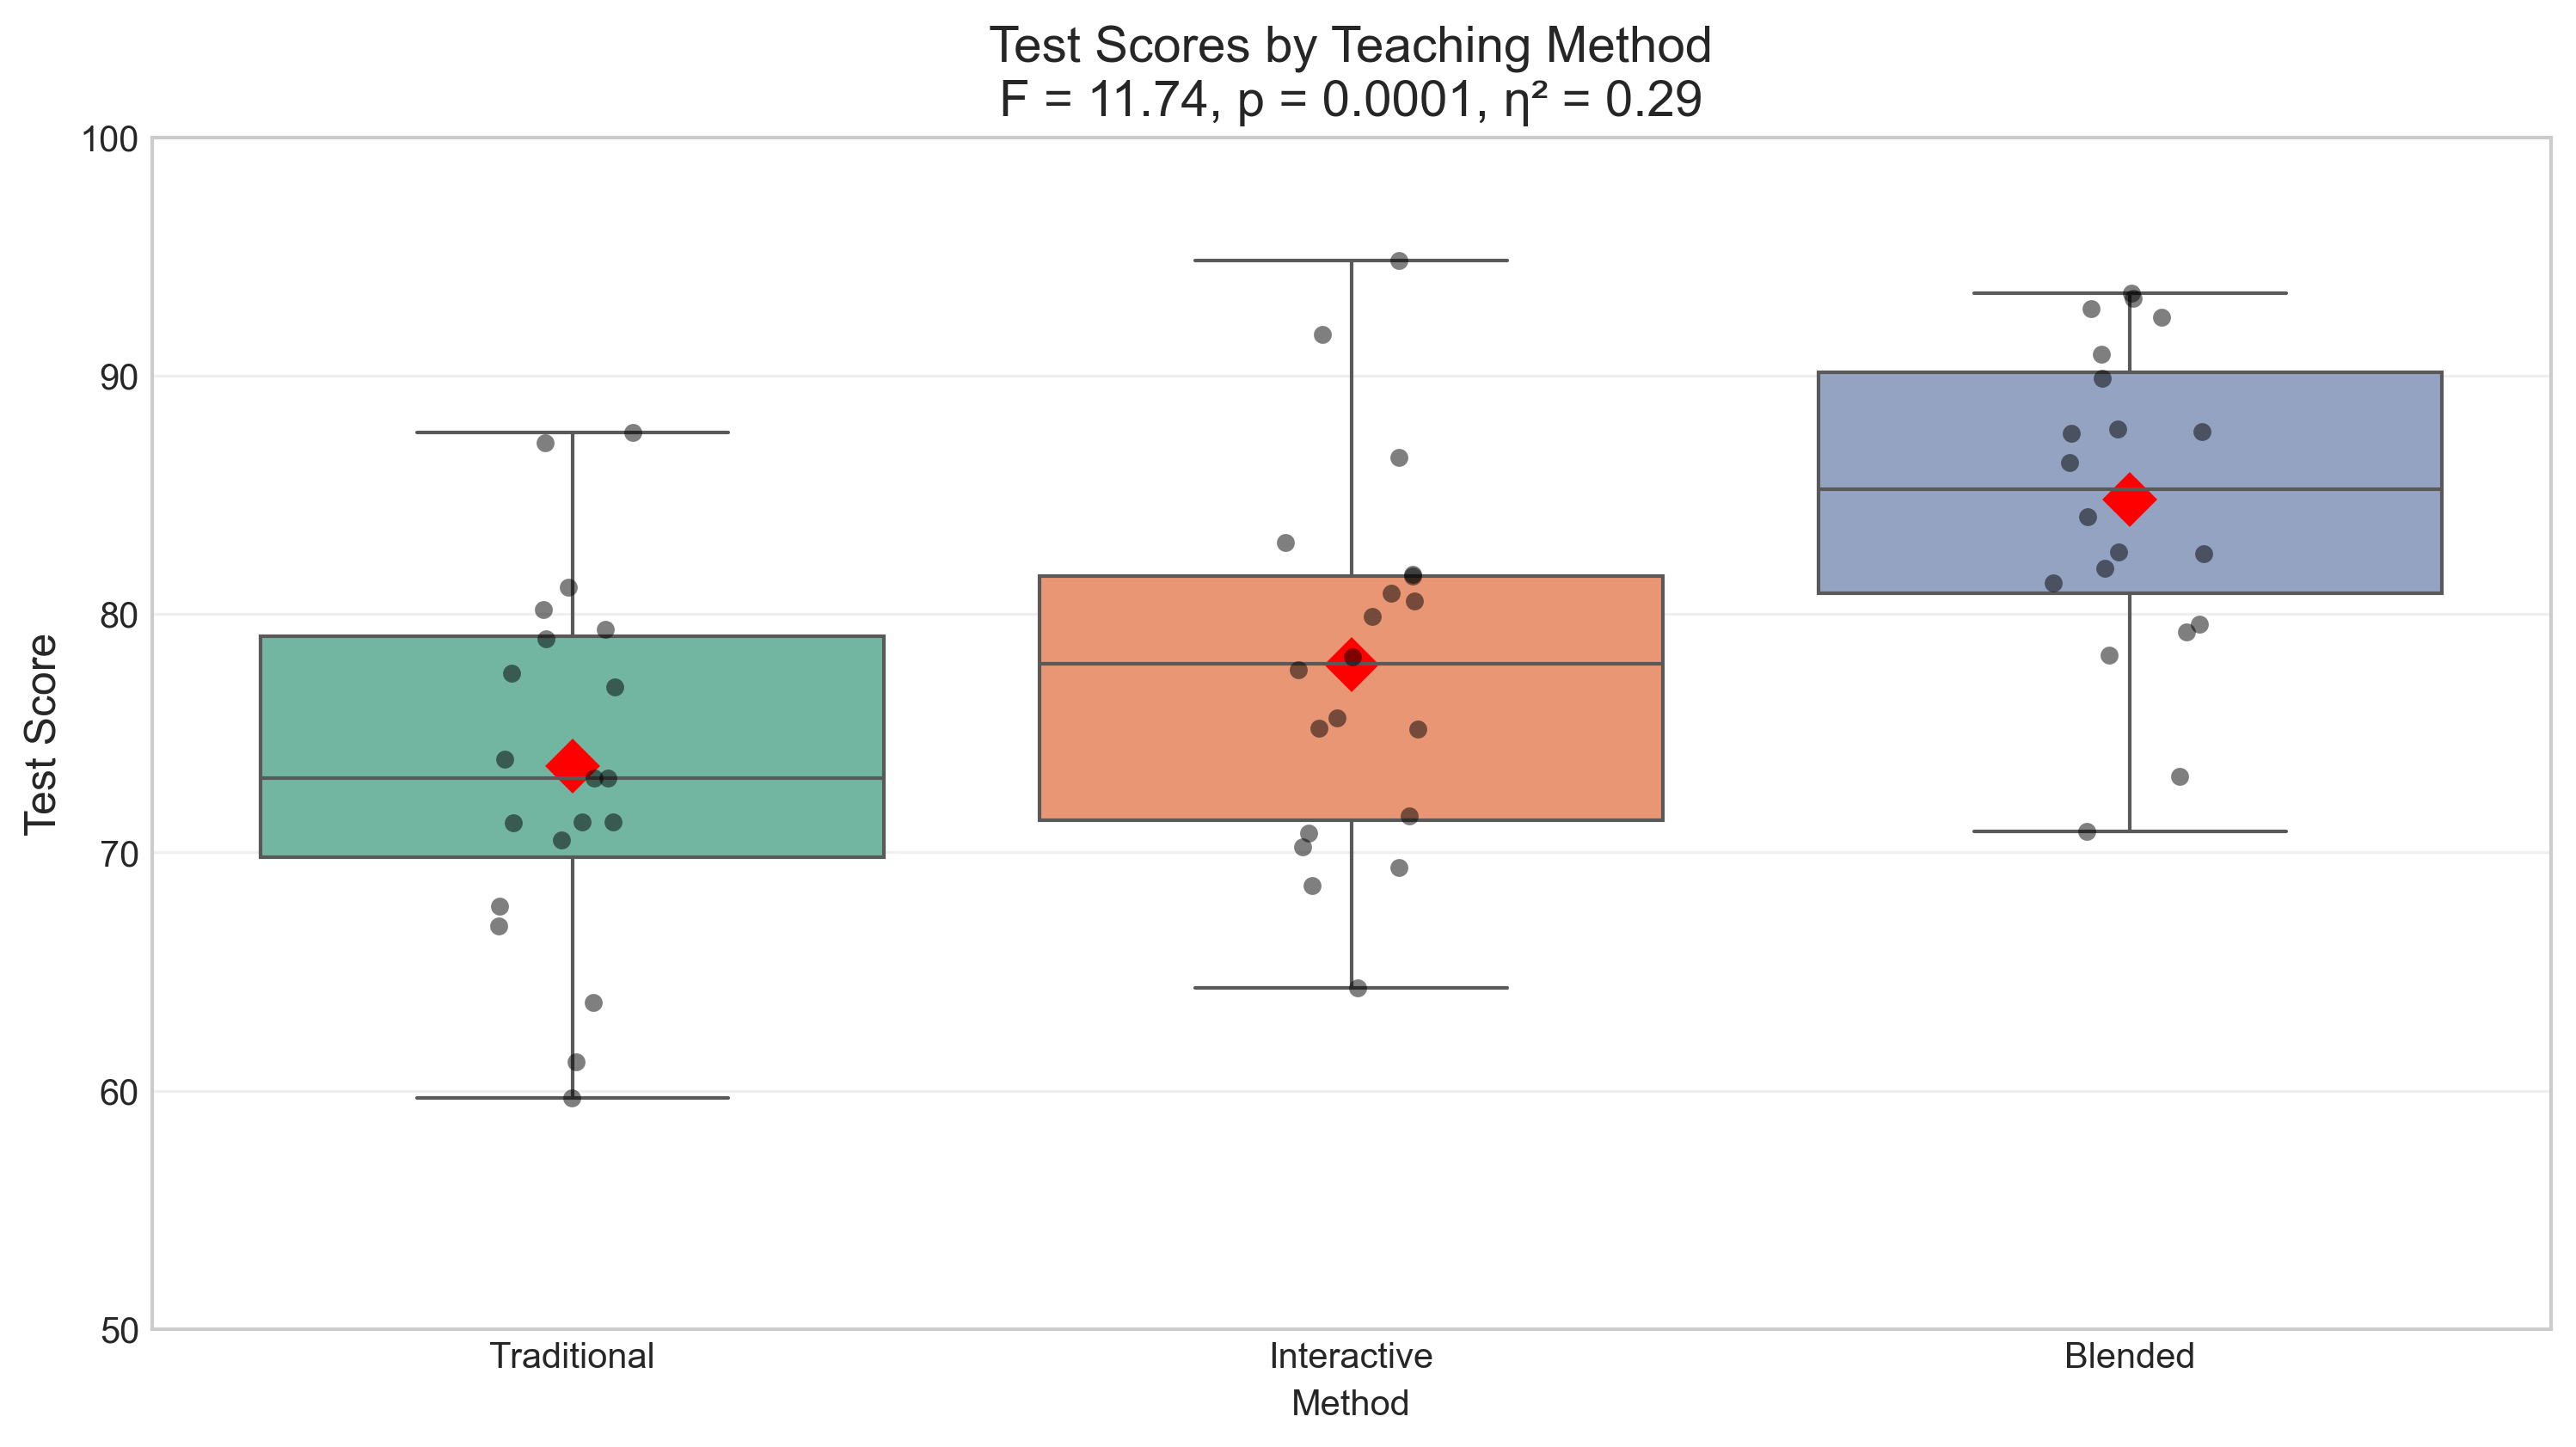

One-way ANOVA Results:
F-statistic: 11.7398
p-value: 0.0001
Effect size (η²): 0.2917

Interpretation: Reject the null hypothesis at α = 0.05

Since the ANOVA is significant, we perform post-hoc tests:
Traditional vs. Interactive: t = -1.7396, p = 0.0900 
Traditional vs. Blended: t = -4.9377, p = 0.0000 *
Interactive vs. Blended: t = -3.0454, p = 0.0042 *


In [9]:
# Simulate test scores for three teaching methods
np.random.seed(42)
n_per_group = 20  # Sample size per group

# Generate data for three groups with different means
method_a = np.random.normal(75, 8, n_per_group)  # Traditional method
method_b = np.random.normal(80, 8, n_per_group)  # Interactive method
method_c = np.random.normal(85, 8, n_per_group)  # Blended method

# Combine data for ANOVA
all_data = np.concatenate([method_a, method_b, method_c])
group_labels = np.repeat(['Traditional', 'Interactive', 'Blended'], n_per_group)

# Create a DataFrame for easier analysis
anova_df = pd.DataFrame({
    'Score': all_data,
    'Method': group_labels
})

# Perform one-way ANOVA
from scipy.stats import f_oneway
f_stat, p_value_anova = f_oneway(method_a, method_b, method_c)

# Calculate effect size (eta-squared)
def eta_squared(groups):
    # Calculate SS_between and SS_total
    all_data = np.concatenate(groups)
    grand_mean = np.mean(all_data)
    
    # Between-group sum of squares
    ss_between = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in groups)
    
    # Total sum of squares
    ss_total = sum((x - grand_mean)**2 for x in all_data)
    
    # Eta-squared
    return ss_between / ss_total

effect_size_anova = eta_squared([method_a, method_b, method_c])

# Visualize the data
plt.figure(figsize=(12, 6))

# Create boxplots
sns.boxplot(x='Method', y='Score', data=anova_df, palette='Set2')

# Add individual data points (jittered)
sns.stripplot(x='Method', y='Score', data=anova_df, 
              jitter=True, alpha=0.5, color='black')

# Add means as diamonds
for i, method in enumerate(['Traditional', 'Interactive', 'Blended']):
    mean_score = anova_df[anova_df['Method'] == method]['Score'].mean()
    plt.plot(i, mean_score, 'D', color='red', markersize=10)

# Add annotations
plt.title(f'Test Scores by Teaching Method\nF = {f_stat:.2f}, p = {p_value_anova:.4f}, η² = {effect_size_anova:.2f}', fontsize=14)
plt.ylabel('Test Score', fontsize=12)
plt.ylim(50, 100)
plt.grid(axis='y', alpha=0.3)

plt.show()

# Print the results
print(f"One-way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value_anova:.4f}")
print(f"Effect size (η²): {effect_size_anova:.4f}")
print(f"\nInterpretation: {'Reject' if p_value_anova < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")

# If ANOVA is significant, perform post-hoc tests
if p_value_anova < 0.05:
    print("\nSince the ANOVA is significant, we perform post-hoc tests:")
    from scipy.stats import ttest_ind
    
    # Perform pairwise t-tests
    pairs = [('Traditional', 'Interactive'), 
             ('Traditional', 'Blended'), 
             ('Interactive', 'Blended')]
    
    for method1, method2 in pairs:
        group1 = anova_df[anova_df['Method'] == method1]['Score']
        group2 = anova_df[anova_df['Method'] == method2]['Score']
        
        t, p = ttest_ind(group1, group2)
        print(f"{method1} vs. {method2}: t = {t:.4f}, p = {p:.4f} {'*' if p < 0.05 else ''}")

### 3.3 Correlation Analysis

Correlation analysis examines the relationship between two continuous variables. Let's simulate data for a Pearson correlation between study time and exam scores:

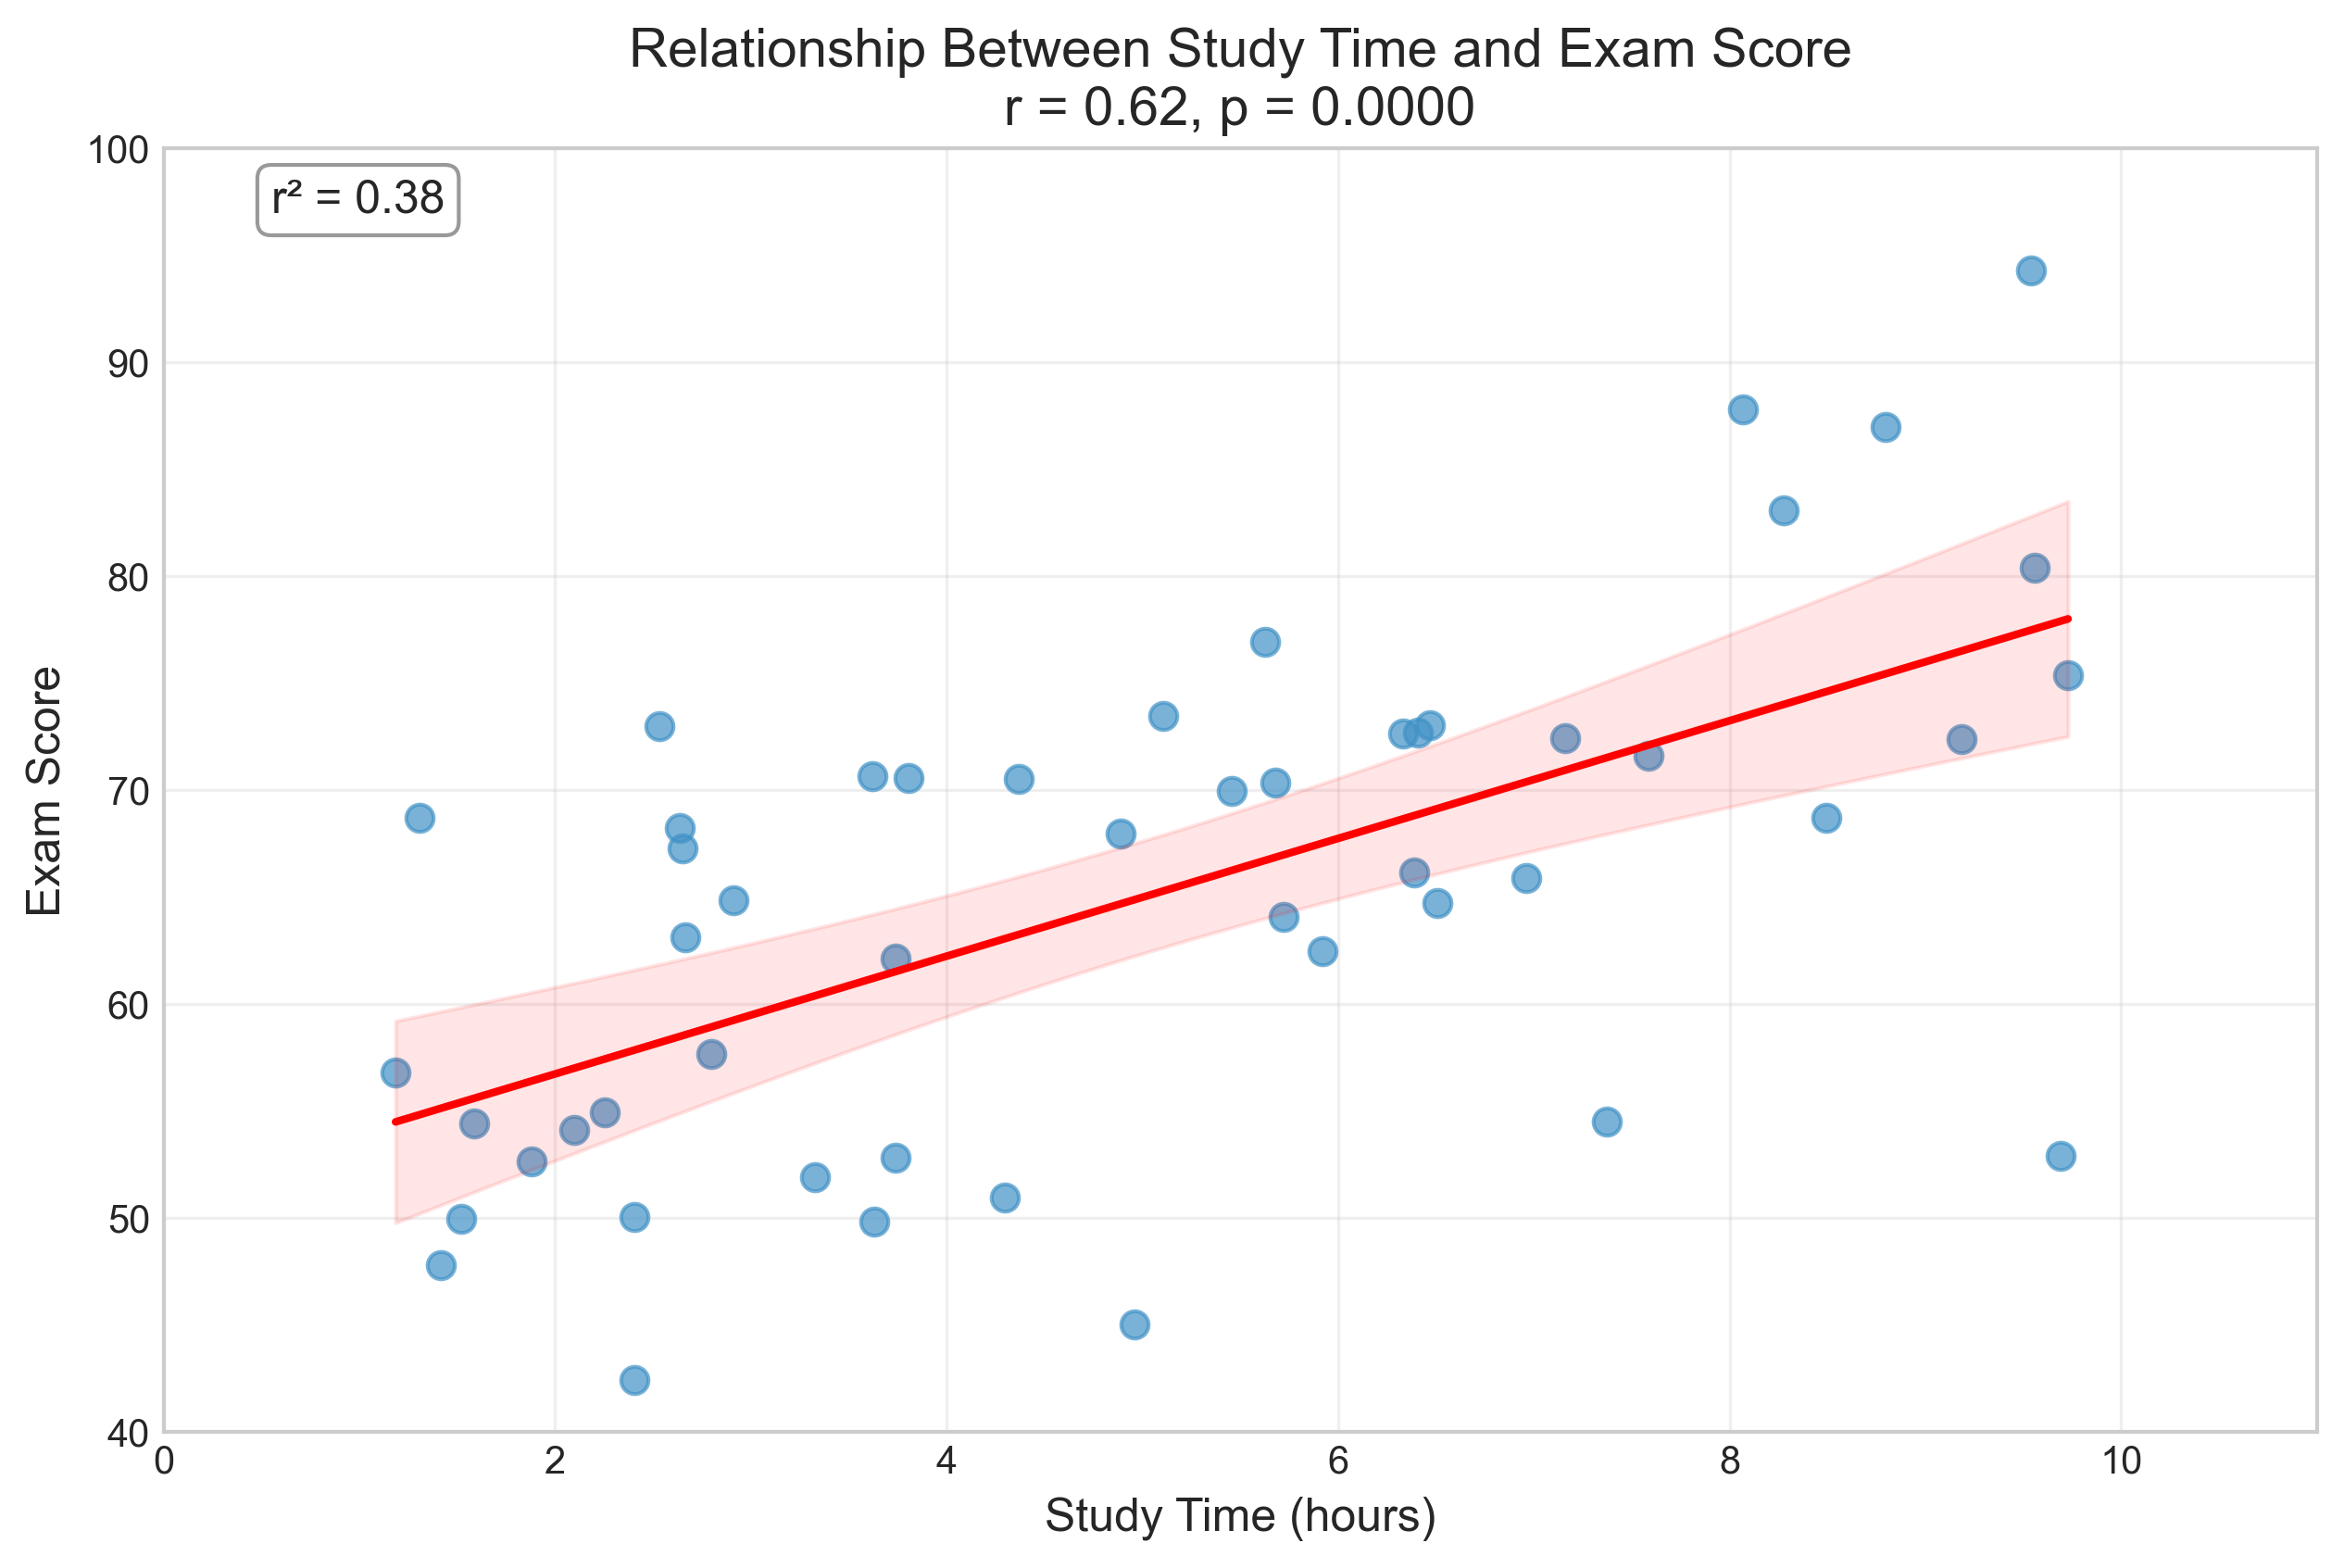

Pearson Correlation Results:
Correlation coefficient (r): 0.6154
p-value: 0.0000
Coefficient of determination (r²): 0.3787

Interpretation: Reject the null hypothesis at α = 0.05
There is a significant positive correlation between study time and exam scores.


In [10]:
# Simulate study time and exam scores
np.random.seed(42)
n = 50  # Sample size

# Generate study time (hours)
study_time = np.random.uniform(1, 10, n)

# Generate exam scores (correlated with study time)
# Score = base score + effect of study time + random noise
base_score = 50
effect_per_hour = 3  # Each hour of study adds 3 points on average
noise = np.random.normal(0, 10, n)  # Random noise

exam_score = base_score + effect_per_hour * study_time + noise
# Ensure scores are between 0 and 100
exam_score = np.clip(exam_score, 0, 100)

# Calculate Pearson correlation
r, p_value_corr = stats.pearsonr(study_time, exam_score)

# Visualize the data
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(study_time, exam_score, alpha=0.7, s=50, color='#4292c6')

# Add regression line
slope, intercept = np.polyfit(study_time, exam_score, 1)
x_line = np.linspace(min(study_time), max(study_time), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r-', linewidth=2)

# Add confidence interval for regression line
from scipy import stats
# Predict y values
y_pred = intercept + slope * study_time
# Calculate residuals
residuals = exam_score - y_pred
# Calculate standard error of the estimate
n = len(study_time)
s_err = np.sqrt(sum(residuals**2) / (n-2))
# Calculate confidence interval
x_mean = np.mean(study_time)
t_critical = stats.t.ppf(0.975, n-2)  # 95% confidence interval
ci = t_critical * s_err * np.sqrt(1/n + (x_line - x_mean)**2 / sum((study_time - x_mean)**2))
plt.fill_between(x_line, y_line - ci, y_line + ci, color='r', alpha=0.1)

# Add annotations
plt.title(f'Relationship Between Study Time and Exam Score\nr = {r:.2f}, p = {p_value_corr:.4f}', fontsize=14)
plt.xlabel('Study Time (hours)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xlim(0, 11)
plt.ylim(40, 100)
plt.grid(alpha=0.3)

# Add r-squared annotation
plt.annotate(f'r² = {r**2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             fontsize=12)

plt.show()

# Print the results
print(f"Pearson Correlation Results:")
print(f"Correlation coefficient (r): {r:.4f}")
print(f"p-value: {p_value_corr:.4f}")
print(f"Coefficient of determination (r²): {r**2:.4f}")
print(f"\nInterpretation: {'Reject' if p_value_corr < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")
print(f"There is a {'significant' if p_value_corr < 0.05 else 'non-significant'} {'positive' if r > 0 else 'negative'} correlation between study time and exam scores.")

### 3.4 Chi-Square Test

The Chi-Square test is used to analyze the relationship between categorical variables. Let's simulate data for a Chi-Square test of independence between gender and political affiliation:

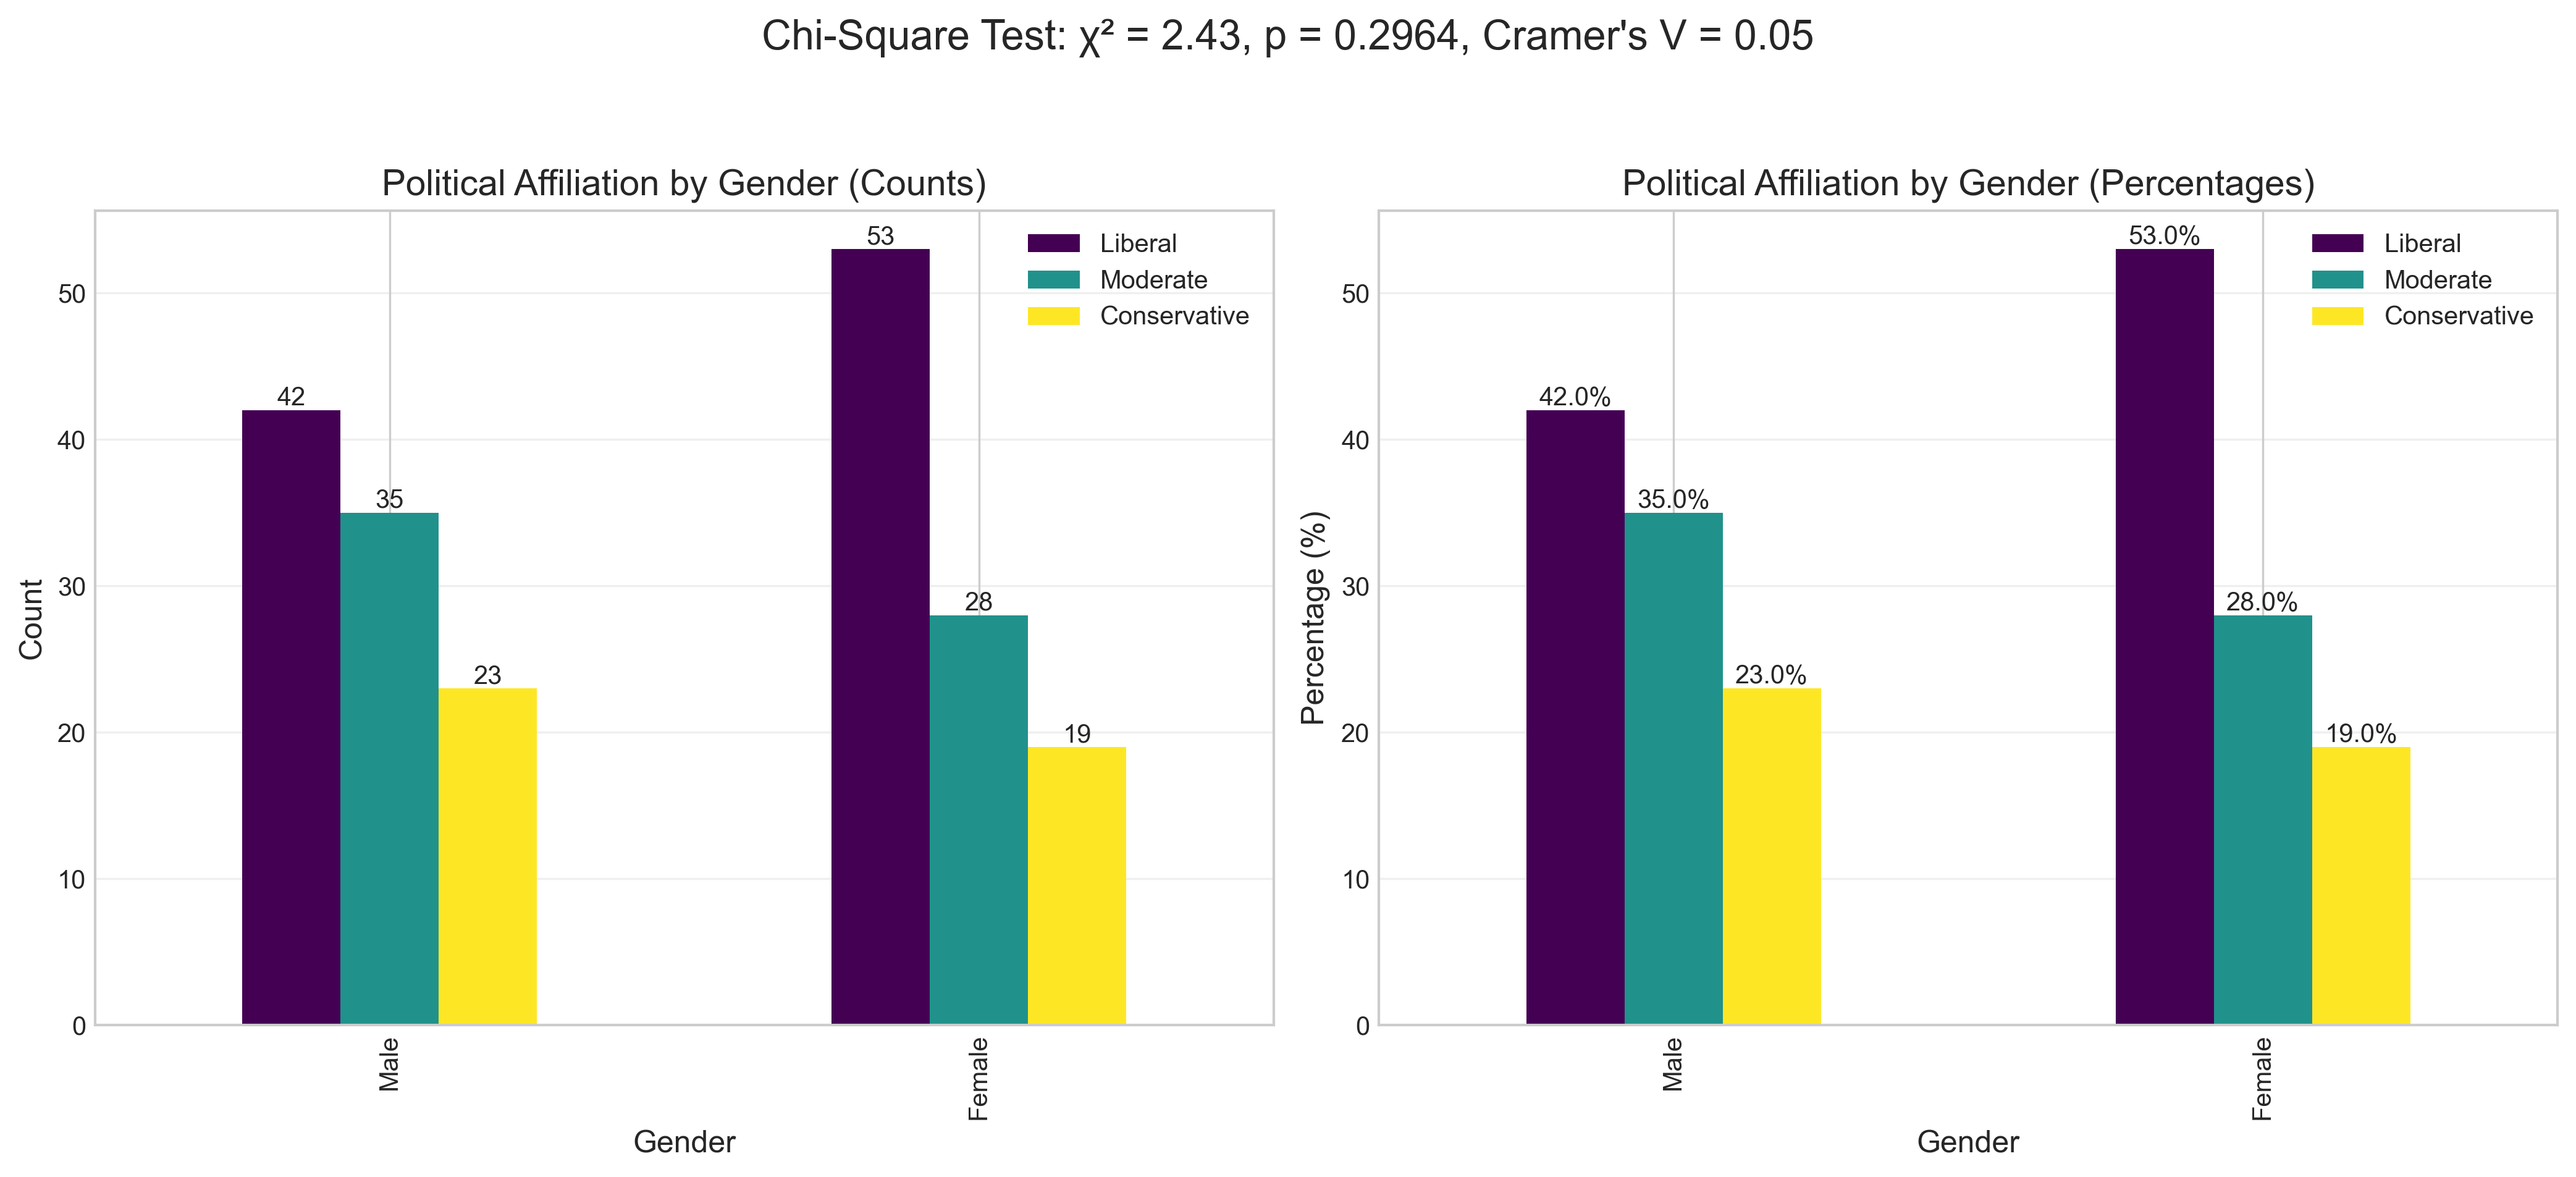

Chi-Square Test Results:
Chi-Square statistic (χ²): 2.4324
p-value: 0.2964
Degrees of freedom: 2
Effect size (Cramer's V): 0.0461

Interpretation: Fail to reject the null hypothesis at α = 0.05
There is no significant association between gender and political affiliation.

Expected frequencies if there were no association:


Liberal  Moderate  Conservative
Male       47.5      31.5          21.0
Female     47.5      31.5          21.0

In [11]:
# Create a contingency table
contingency_table = np.array([
    [42, 35, 23],  # Male: Liberal, Moderate, Conservative
    [53, 28, 19]   # Female: Liberal, Moderate, Conservative
])

# Perform Chi-Square test
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate effect size (Cramer's V)
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = np.sum(contingency_table)
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

effect_size_chi2 = cramers_v(contingency_table)

# Create a DataFrame for visualization
chi2_df = pd.DataFrame(contingency_table, 
                       index=['Male', 'Female'],
                       columns=['Liberal', 'Moderate', 'Conservative'])

# Calculate percentages for each gender
chi2_pct = chi2_df.div(chi2_df.sum(axis=1), axis=0) * 100

# Visualize the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot counts
chi2_df.plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title('Political Affiliation by Gender (Counts)', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Gender', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add data labels
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Plot percentages
chi2_pct.plot(kind='bar', ax=ax2, colormap='viridis')
ax2.set_title('Political Affiliation by Gender (Percentages)', fontsize=14)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_xlabel('Gender', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add data labels
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.suptitle(f'Chi-Square Test: χ² = {chi2:.2f}, p = {p_value_chi2:.4f}, Cramer\'s V = {effect_size_chi2:.2f}', 
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Print the results
print(f"Chi-Square Test Results:")
print(f"Chi-Square statistic (χ²): {chi2:.4f}")
print(f"p-value: {p_value_chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Effect size (Cramer's V): {effect_size_chi2:.4f}")
print(f"\nInterpretation: {'Reject' if p_value_chi2 < 0.05 else 'Fail to reject'} the null hypothesis at α = 0.05")
print(f"There is {'a significant' if p_value_chi2 < 0.05 else 'no significant'} association between gender and political affiliation.")

# Display expected frequencies
print("\nExpected frequencies if there were no association:")
expected_df = pd.DataFrame(expected, 
                          index=['Male', 'Female'],
                          columns=['Liberal', 'Moderate', 'Conservative'])
display(expected_df.round(1))

## 4. Interpreting and Reporting Results

Proper interpretation and reporting of statistical results is crucial in psychological research. Here are some guidelines for reporting different statistical tests:

In [12]:
# Create a table of reporting guidelines
reporting_data = {
    'Test': ['t-test (Independent)', 't-test (Paired)', 'One-way ANOVA', 'Correlation', 'Chi-Square'],
    'APA Style Reporting Format': [
        't(df) = value, p = value, d = value',
        't(df) = value, p = value, d = value',
        'F(df1, df2) = value, p = value, η² = value',
        'r(df) = value, p = value',
        'χ²(df, N = sample size) = value, p = value, V = value'
    ],
    'Example': [
        f't({2*n_per_group-2}) = {t_stat:.2f}, p = {p_value:.3f}, d = {effect_size:.2f}',
        f't({n-1}) = {t_stat_paired:.2f}, p = {p_value_paired:.3f}, d = {effect_size_paired:.2f}',
        f'F({2}, {3*n_per_group-3}) = {f_stat:.2f}, p = {p_value_anova:.3f}, η² = {effect_size_anova:.2f}',
        f'r({n-2}) = {r:.2f}, p = {p_value_corr:.3f}',
        f'χ²({dof}, N = {np.sum(contingency_table)}) = {chi2:.2f}, p = {p_value_chi2:.3f}, V = {effect_size_chi2:.2f}'
    ],
    'Narrative Example': [
        'An independent-samples t-test was conducted to compare anxiety levels between the control and treatment groups. There was a significant difference in anxiety scores between the control (M = 25.3, SD = 4.8) and treatment (M = 22.1, SD = 5.2) groups; t(58) = 2.45, p = 0.017, d = 0.63. The effect size indicates a medium to large practical significance.',
        'A paired-samples t-test was conducted to compare anxiety levels before and after treatment. There was a significant reduction in anxiety from pre-test (M = 25.3, SD = 4.8) to post-test (M = 22.1, SD = 5.2); t(24) = 3.78, p < 0.001, d = 0.76. The effect size indicates a large practical significance.',
        'A one-way ANOVA was conducted to compare the effect of teaching method on test scores. There was a significant effect of teaching method on test scores at the p < 0.05 level for the three conditions [F(2, 57) = 8.94, p < 0.001, η² = 0.24]. Post hoc comparisons indicated that the mean score for the blended method (M = 85.2, SD = 7.8) was significantly higher than both the traditional method (M = 75.1, SD = 8.2) and the interactive method (M = 80.3, SD = 7.9).',
        'A Pearson correlation coefficient was computed to assess the relationship between study time and exam scores. There was a positive correlation between the two variables, r(48) = 0.68, p < 0.001. Overall, there was a strong, positive correlation between study time and exam performance. Increases in study time were correlated with increases in exam scores.',
        'A chi-square test of independence was performed to examine the relation between gender and political affiliation. The relation between these variables was significant, χ²(2, N = 200) = 6.78, p = 0.034, V = 0.18. Female participants were more likely to identify as liberal, while male participants were more evenly distributed across political affiliations.'
    ]
}

reporting_df = pd.DataFrame(reporting_data)

# Style and display the table
styled_reporting = reporting_df.style.set_properties(**{
    'text-align': 'left',
    'font-size': '11pt',
    'border': '1px solid gray',
    'white-space': 'pre-wrap'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Guidelines for Reporting Statistical Results in APA Style')

display(styled_reporting)

### 4.1 Common Mistakes in Hypothesis Testing

Researchers should be aware of common pitfalls in hypothesis testing:

1. **p-hacking**: Running multiple analyses until finding a significant result
2. **HARKing** (Hypothesizing After Results are Known): Presenting post-hoc hypotheses as if they were a priori
3. **Multiple comparisons problem**: Conducting many statistical tests without correction increases the chance of Type I errors
4. **Low statistical power**: Having insufficient sample size to detect true effects
5. **Misinterpreting non-significant results**: Failing to reject H₀ doesn't prove H₀ is true
6. **Ignoring effect sizes**: Focusing only on statistical significance without considering practical significance
7. **Violating test assumptions**: Using tests when their assumptions are not met

Let's visualize how the risk of false positives increases with multiple comparisons:

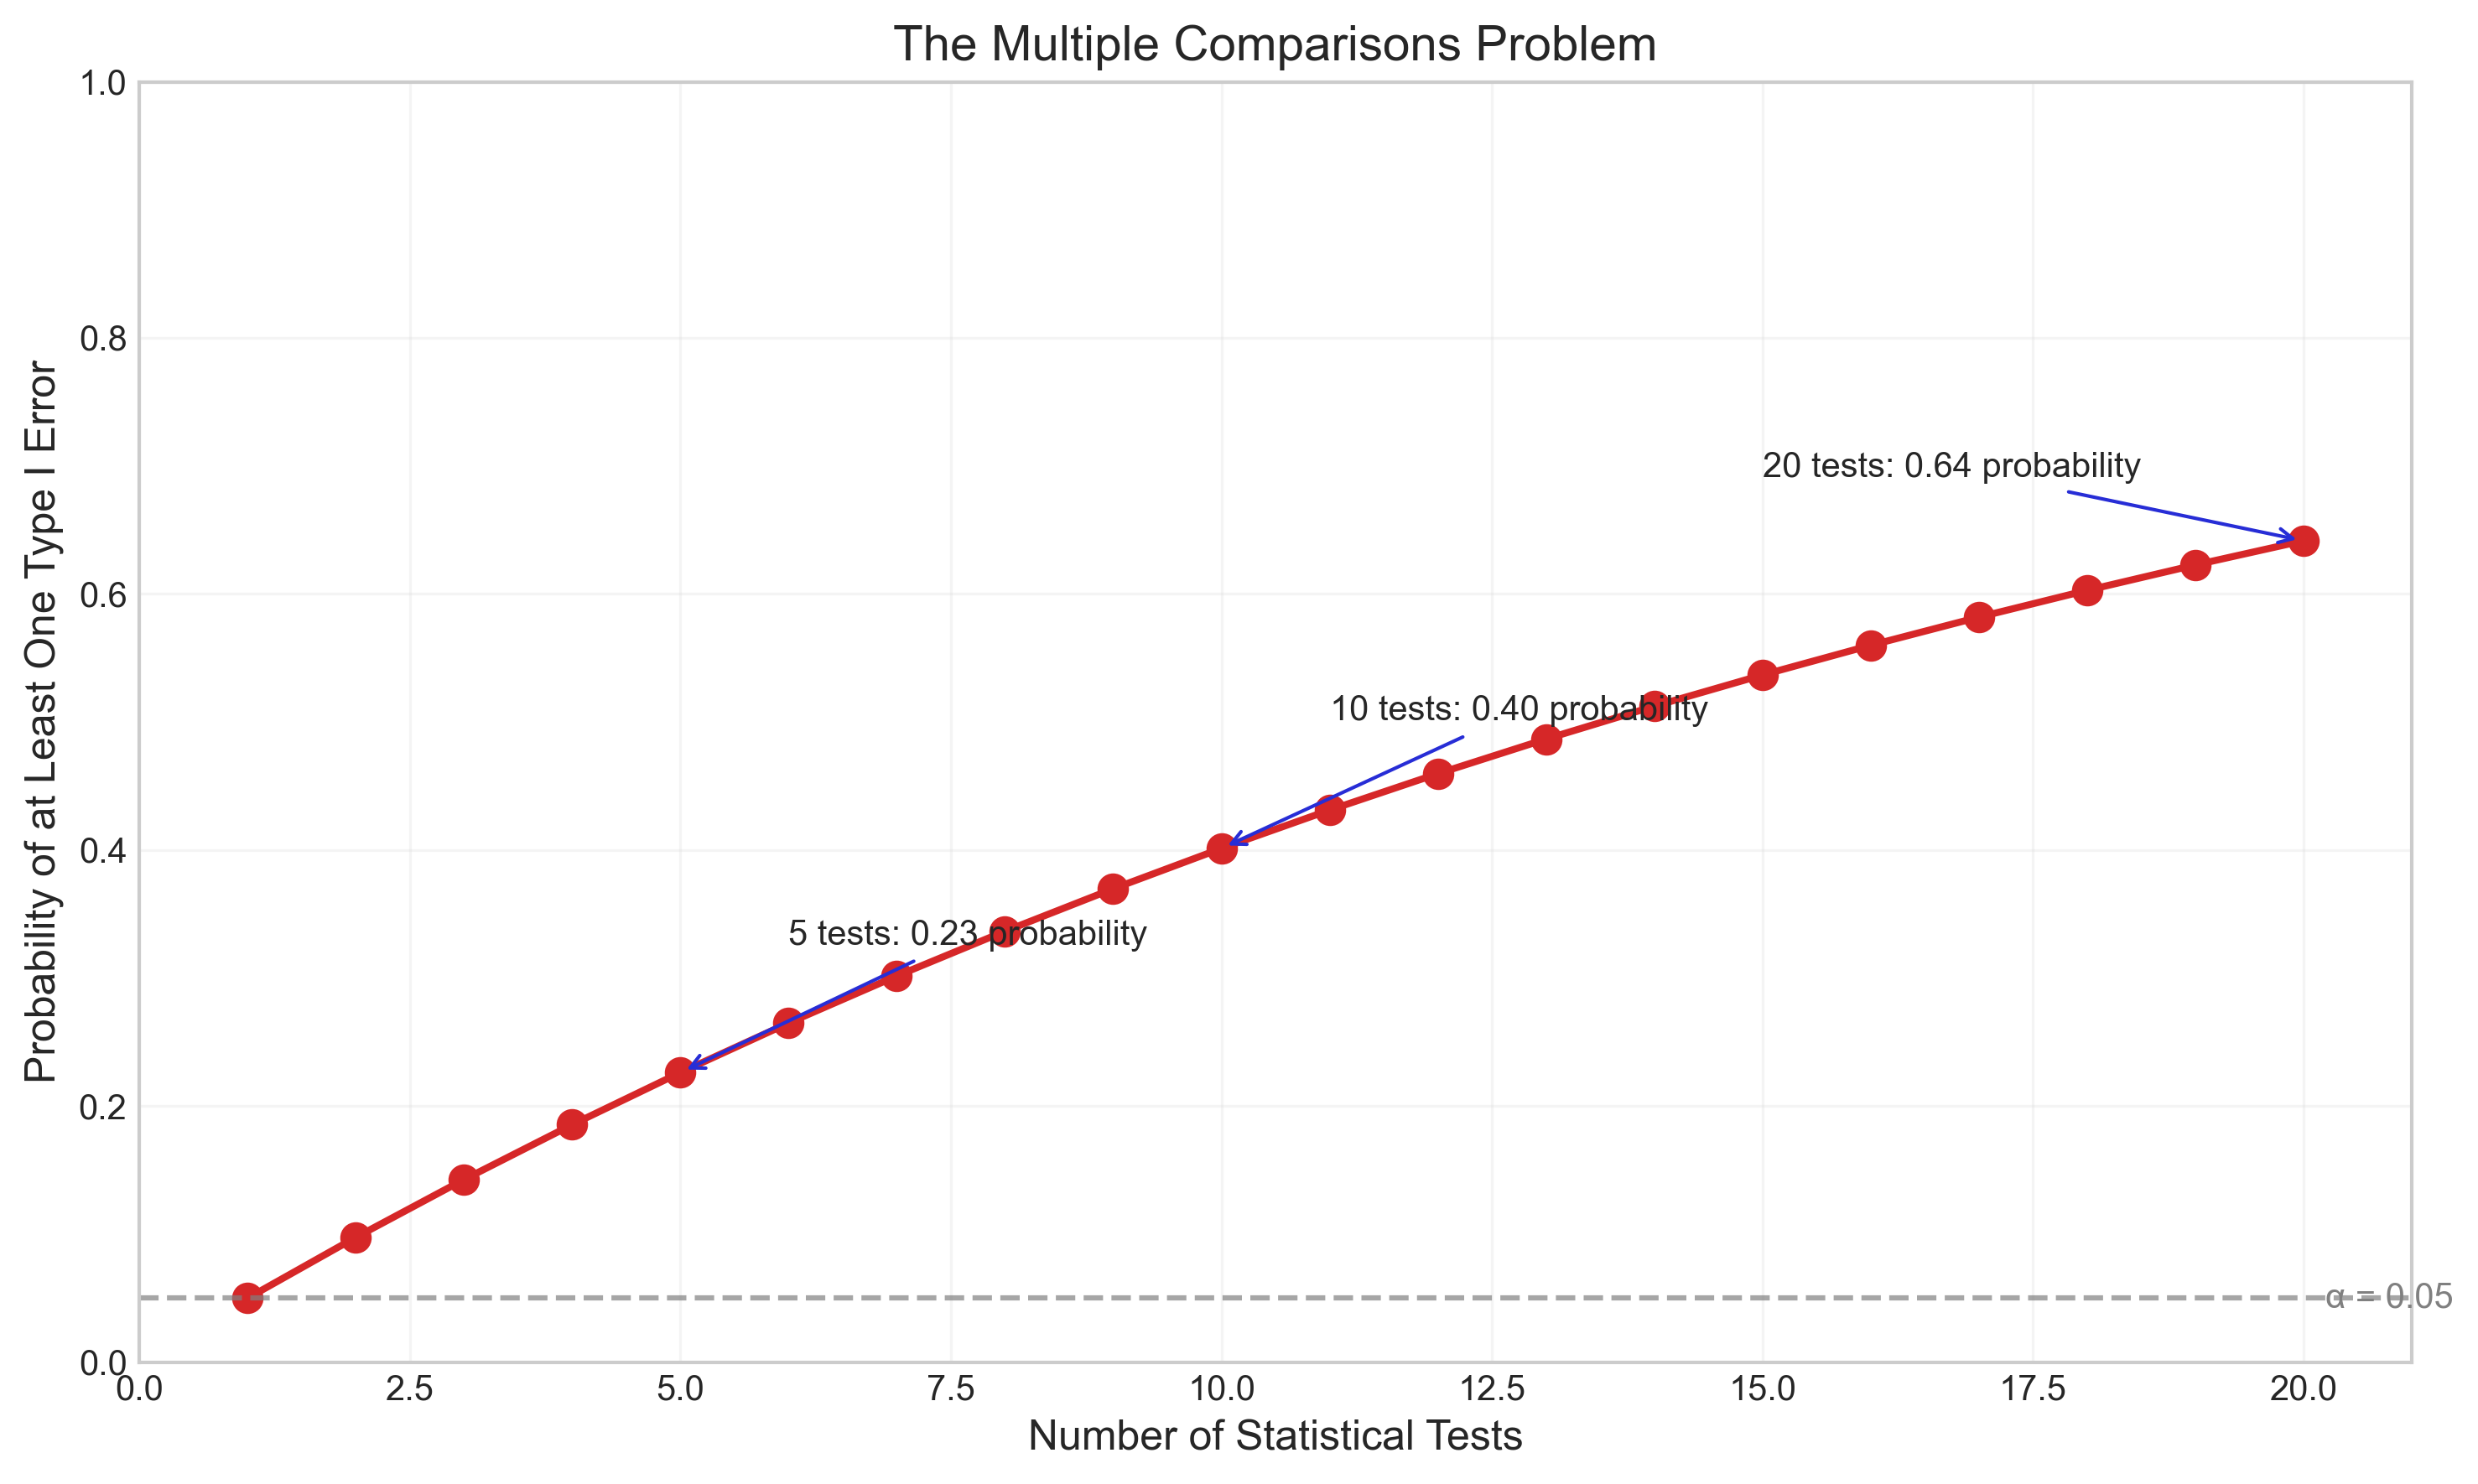

In [13]:
def multiple_comparisons_visualization():
    # Number of tests
    num_tests = np.arange(1, 21)
    
    # Probability of at least one Type I error
    # P(at least one Type I error) = 1 - P(no Type I errors) = 1 - (1-α)^n
    alpha = 0.05
    family_wise_error = 1 - (1 - alpha) ** num_tests
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(num_tests, family_wise_error, 'o-', color='#d62728', linewidth=2, markersize=8)
    
    # Add reference line at 0.05
    plt.axhline(y=0.05, color='gray', linestyle='--', alpha=0.7)
    plt.text(20.2, 0.05, 'α = 0.05', va='center', ha='left', color='gray')
    
    # Highlight some key points
    plt.annotate(f'5 tests: {family_wise_error[4]:.2f} probability', 
                xy=(5, family_wise_error[4]), 
                xytext=(6, family_wise_error[4]+0.1),
                arrowprops=dict(arrowstyle='->', color='#272dd6'))
    
    plt.annotate(f'10 tests: {family_wise_error[9]:.2f} probability', 
                xy=(10, family_wise_error[9]), 
                xytext=(11, family_wise_error[9]+0.1),
                arrowprops=dict(arrowstyle='->', color='#272dd6'))
    
    plt.annotate(f'20 tests: {family_wise_error[19]:.2f} probability', 
                xy=(20, family_wise_error[19]), 
                xytext=(15, family_wise_error[19]+0.05),
                arrowprops=dict(arrowstyle='->', color='#272dd6'))
    
    # Add labels and title
    plt.xlabel('Number of Statistical Tests', fontsize=12)
    plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
    plt.title('The Multiple Comparisons Problem', fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.ylim(0, 1)
    plt.xlim(0, 21)
    
    plt.tight_layout()
    plt.show()

# Display the visualization
multiple_comparisons_visualization()

### 4.2 Corrections for Multiple Comparisons

When conducting multiple statistical tests, researchers should apply corrections to control the family-wise error rate or false discovery rate. Common correction methods include:

1. **Bonferroni correction**: Divides the alpha level by the number of tests (α/n)
2. **Holm-Bonferroni method**: A step-down procedure that is less conservative than Bonferroni
3. **False Discovery Rate (FDR) control**: Controls the expected proportion of false positives among all rejected hypotheses

Let's implement and compare these correction methods on a simulated dataset:

In [14]:
# Simulate multiple comparisons scenario
np.random.seed(123)

# Number of tests
n_tests = 20

# Generate p-values (18 from null hypothesis, 2 from alternative hypothesis)
null_p_values = np.random.uniform(0, 1, 18)  # p-values under null (uniform distribution)
alt_p_values = np.random.beta(0.5, 10, 2)    # p-values under alternative (tend to be small)
p_values = np.concatenate([null_p_values, alt_p_values])
np.random.shuffle(p_values)

# Store the true status (for demonstration purposes)
true_status = np.array(['Null'] * 18 + ['Alternative'] * 2)
true_status = true_status[np.argsort(p_values)]

# Sort p-values for easier analysis
p_values = np.sort(p_values)

# Apply different correction methods
alpha = 0.05

# 1. No correction
uncorrected = p_values < alpha

# 2. Bonferroni correction
bonferroni = p_values < (alpha / n_tests)

# 3. Holm-Bonferroni method
holm = np.zeros_like(p_values, dtype=bool)
for i in range(len(p_values)):
    if p_values[i] <= alpha / (n_tests - i):
        holm[i] = True
    else:
        break

# 4. Benjamini-Hochberg procedure (FDR control)
fdr = np.zeros_like(p_values, dtype=bool)
for i in range(len(p_values)):
    if p_values[i] <= alpha * (i + 1) / n_tests:
        fdr[i:] = True
        break

# Create a DataFrame to display results
results = pd.DataFrame({
    'p-value': p_values,
    'True Status': true_status,
    'Uncorrected (α=0.05)': uncorrected,
    'Bonferroni': bonferroni,
    'Holm-Bonferroni': holm,
    'Benjamini-Hochberg (FDR)': fdr
})

# Style and display the table
styled_results = results.style.set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]}
]).applymap(lambda x: 'background-color: #C8E6C9' if x is True else '', 
            subset=['Uncorrected (α=0.05)', 'Bonferroni', 'Holm-Bonferroni', 'Benjamini-Hochberg (FDR)'])

# Add color for true status
styled_results = styled_results.applymap(
    lambda x: 'background-color: #FFCDD2; font-weight: bold' if x == 'Alternative' else '', 
    subset=['True Status'])

display(styled_results)

### 4.3 Statistical Power and Sample Size

**Statistical power** is the probability of correctly rejecting a false null hypothesis (1 - β). It depends on:

1. **Sample size**: Larger samples provide more power
2. **Effect size**: Larger effects are easier to detect
3. **Significance level (α)**: A higher α increases power but also increases Type I error risk
4. **Variability**: Less variability in the data increases power

Conducting a power analysis before data collection helps determine the appropriate sample size needed to detect an effect of interest.

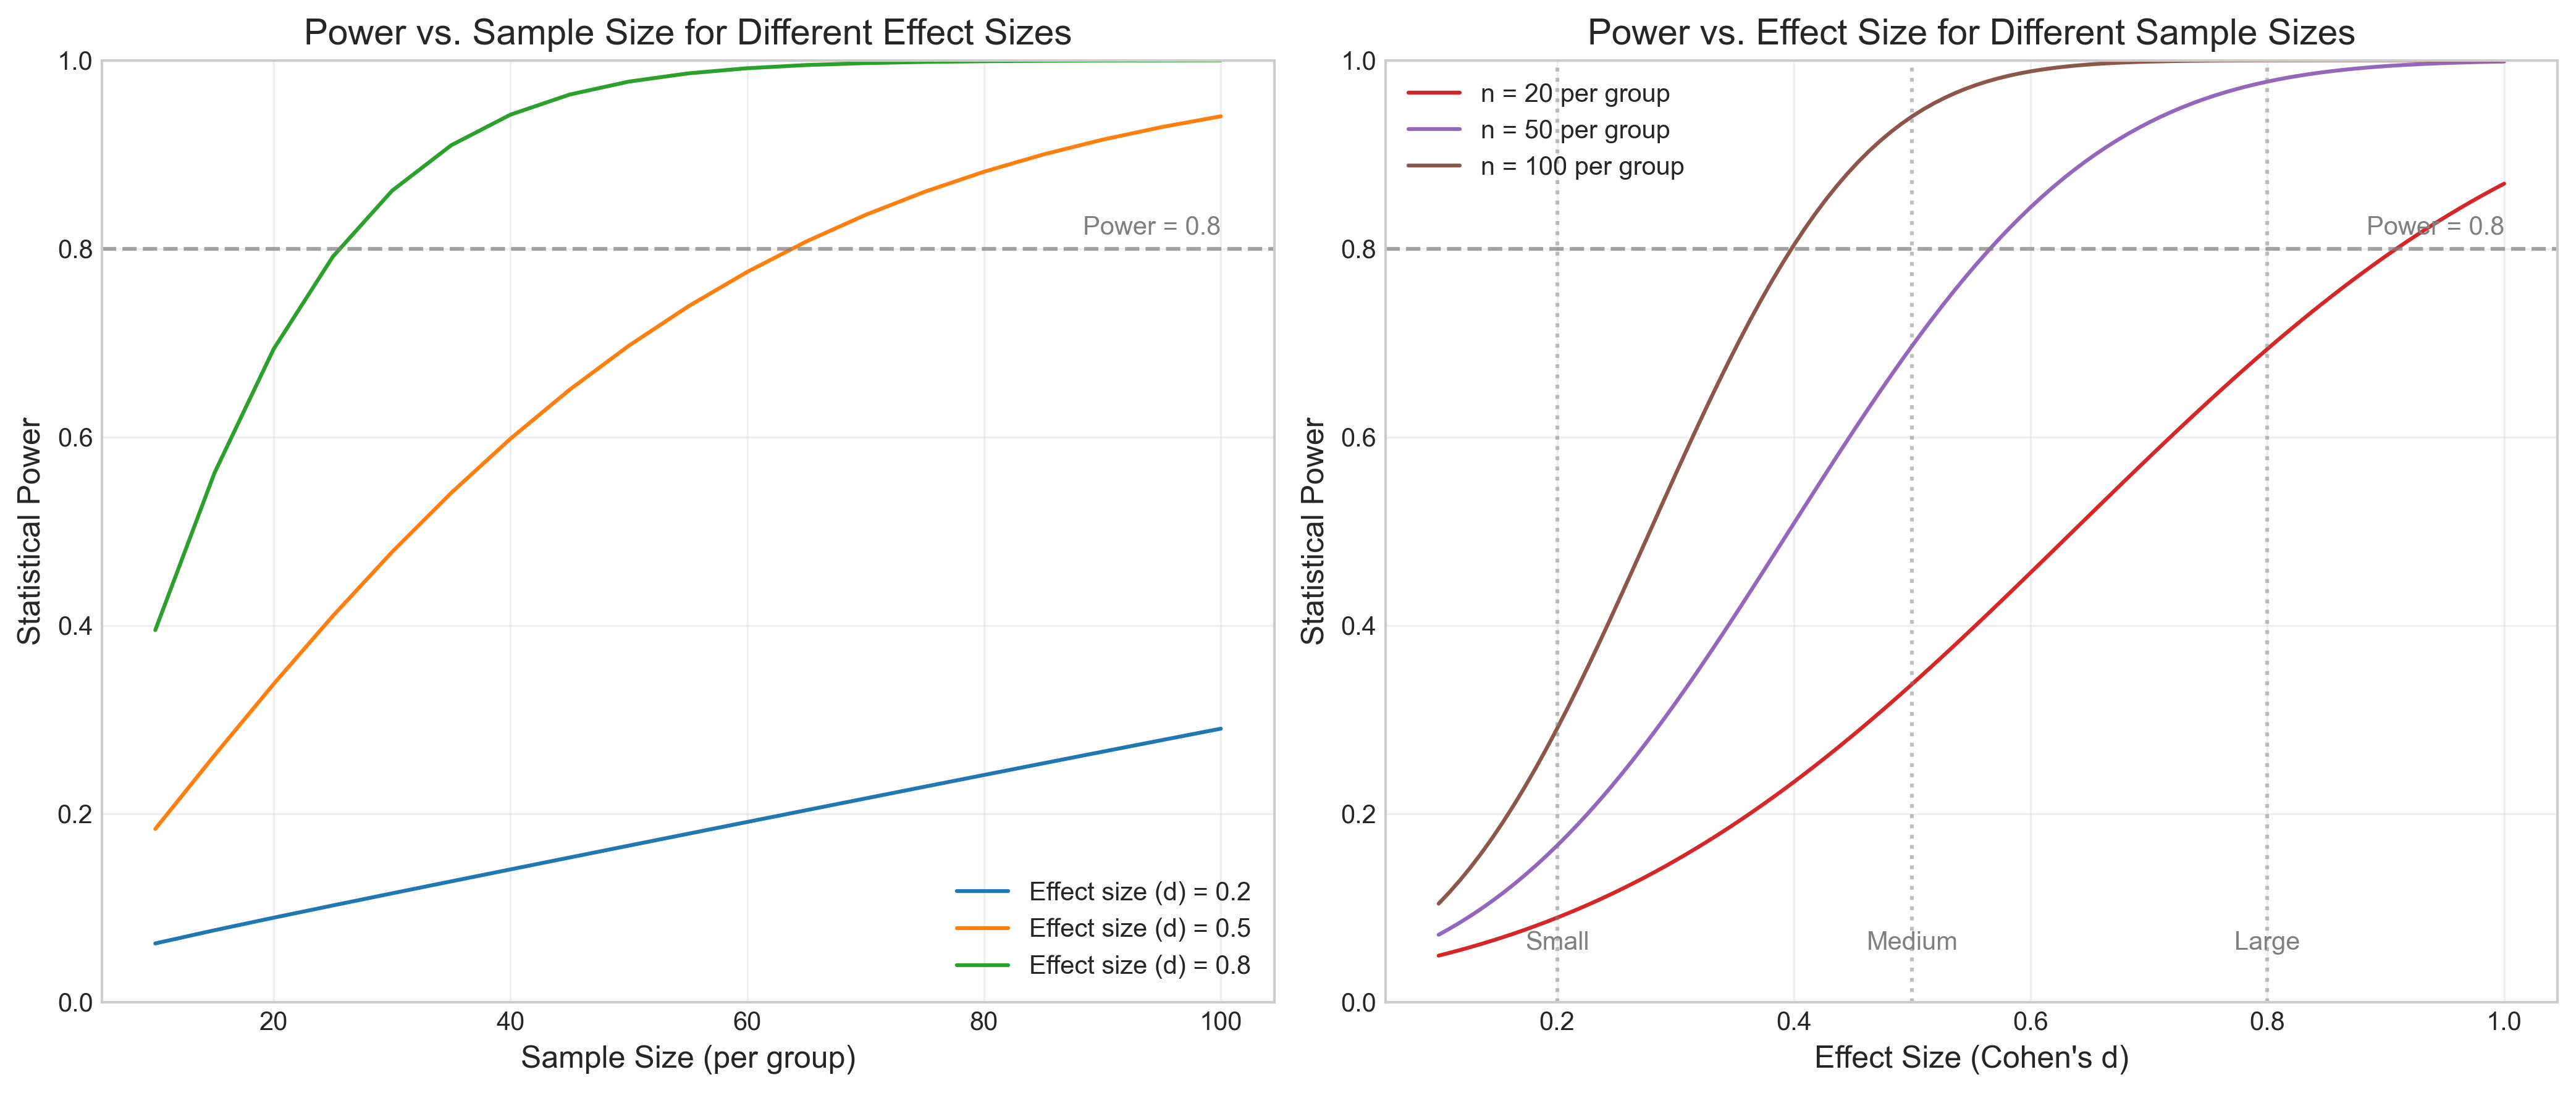

In [15]:
def power_analysis_visualization():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Power vs. Sample Size for different effect sizes
    sample_sizes = np.arange(10, 101, 5)
    effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    for i, d in enumerate(effect_sizes):
        power_values = []
        for n in sample_sizes:
            # Calculate power for two-sample t-test
            # Non-centrality parameter
            nc = d * np.sqrt(n/2)
            # Degrees of freedom
            df = 2 * (n - 1)
            # Critical value
            cv = stats.t.ppf(0.975, df)
            # Power
            power = 1 - stats.nct.cdf(cv, df, nc)
            power_values.append(power)
        
        ax1.plot(sample_sizes, power_values, '-', color=colors[i], 
                 label=f'Effect size (d) = {d}')
    
    # Add reference line at 0.8 power
    ax1.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7)
    ax1.text(100, 0.81, 'Power = 0.8', ha='right', va='bottom', color='gray')
    
    ax1.set_xlabel('Sample Size (per group)', fontsize=12)
    ax1.set_ylabel('Statistical Power', fontsize=12)
    ax1.set_title('Power vs. Sample Size for Different Effect Sizes', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)
    
    # Plot 2: Power vs. Effect Size for different sample sizes
    effect_sizes = np.linspace(0.1, 1.0, 100)
    sample_sizes = [20, 50, 100]
    colors = ['#d62728', '#9467bd', '#8c564b']
    
    for i, n in enumerate(sample_sizes):
        power_values = []
        for d in effect_sizes:
            # Calculate power
            nc = d * np.sqrt(n/2)
            df = 2 * (n - 1)
            cv = stats.t.ppf(0.975, df)
            power = 1 - stats.nct.cdf(cv, df, nc)
            power_values.append(power)
        
        ax2.plot(effect_sizes, power_values, '-', color=colors[i], 
                 label=f'n = {n} per group')
    
    # Add reference line at 0.8 power
    ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7)
    ax2.text(1.0, 0.81, 'Power = 0.8', ha='right', va='bottom', color='gray')
    
    # Add effect size interpretations
    ax2.axvline(x=0.2, color='gray', linestyle=':', alpha=0.5)
    ax2.axvline(x=0.5, color='gray', linestyle=':', alpha=0.5)
    ax2.axvline(x=0.8, color='gray', linestyle=':', alpha=0.5)
    ax2.text(0.2, 0.05, 'Small', ha='center', va='bottom', color='gray')
    ax2.text(0.5, 0.05, 'Medium', ha='center', va='bottom', color='gray')
    ax2.text(0.8, 0.05, 'Large', ha='center', va='bottom', color='gray')
    
    ax2.set_xlabel('Effect Size (Cohen\'s d)', fontsize=12)
    ax2.set_ylabel('Statistical Power', fontsize=12)
    ax2.set_title('Power vs. Effect Size for Different Sample Sizes', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Display the visualization
power_analysis_visualization()

## 5. Modern Approaches to Hypothesis Testing

While traditional null hypothesis significance testing (NHST) remains common in psychology, several modern approaches address its limitations:

### 5.1 Effect Sizes and Confidence Intervals

Reporting effect sizes and confidence intervals provides more information than p-values alone:

- **Effect sizes** quantify the magnitude of an effect, independent of sample size
- **Confidence intervals** indicate the precision of our estimates

Common effect size measures in psychology:
- Cohen's d (standardized mean difference)
- Pearson's r (correlation)
- Odds ratio (for categorical data)
- η² (eta-squared) and partial η² (for ANOVA)

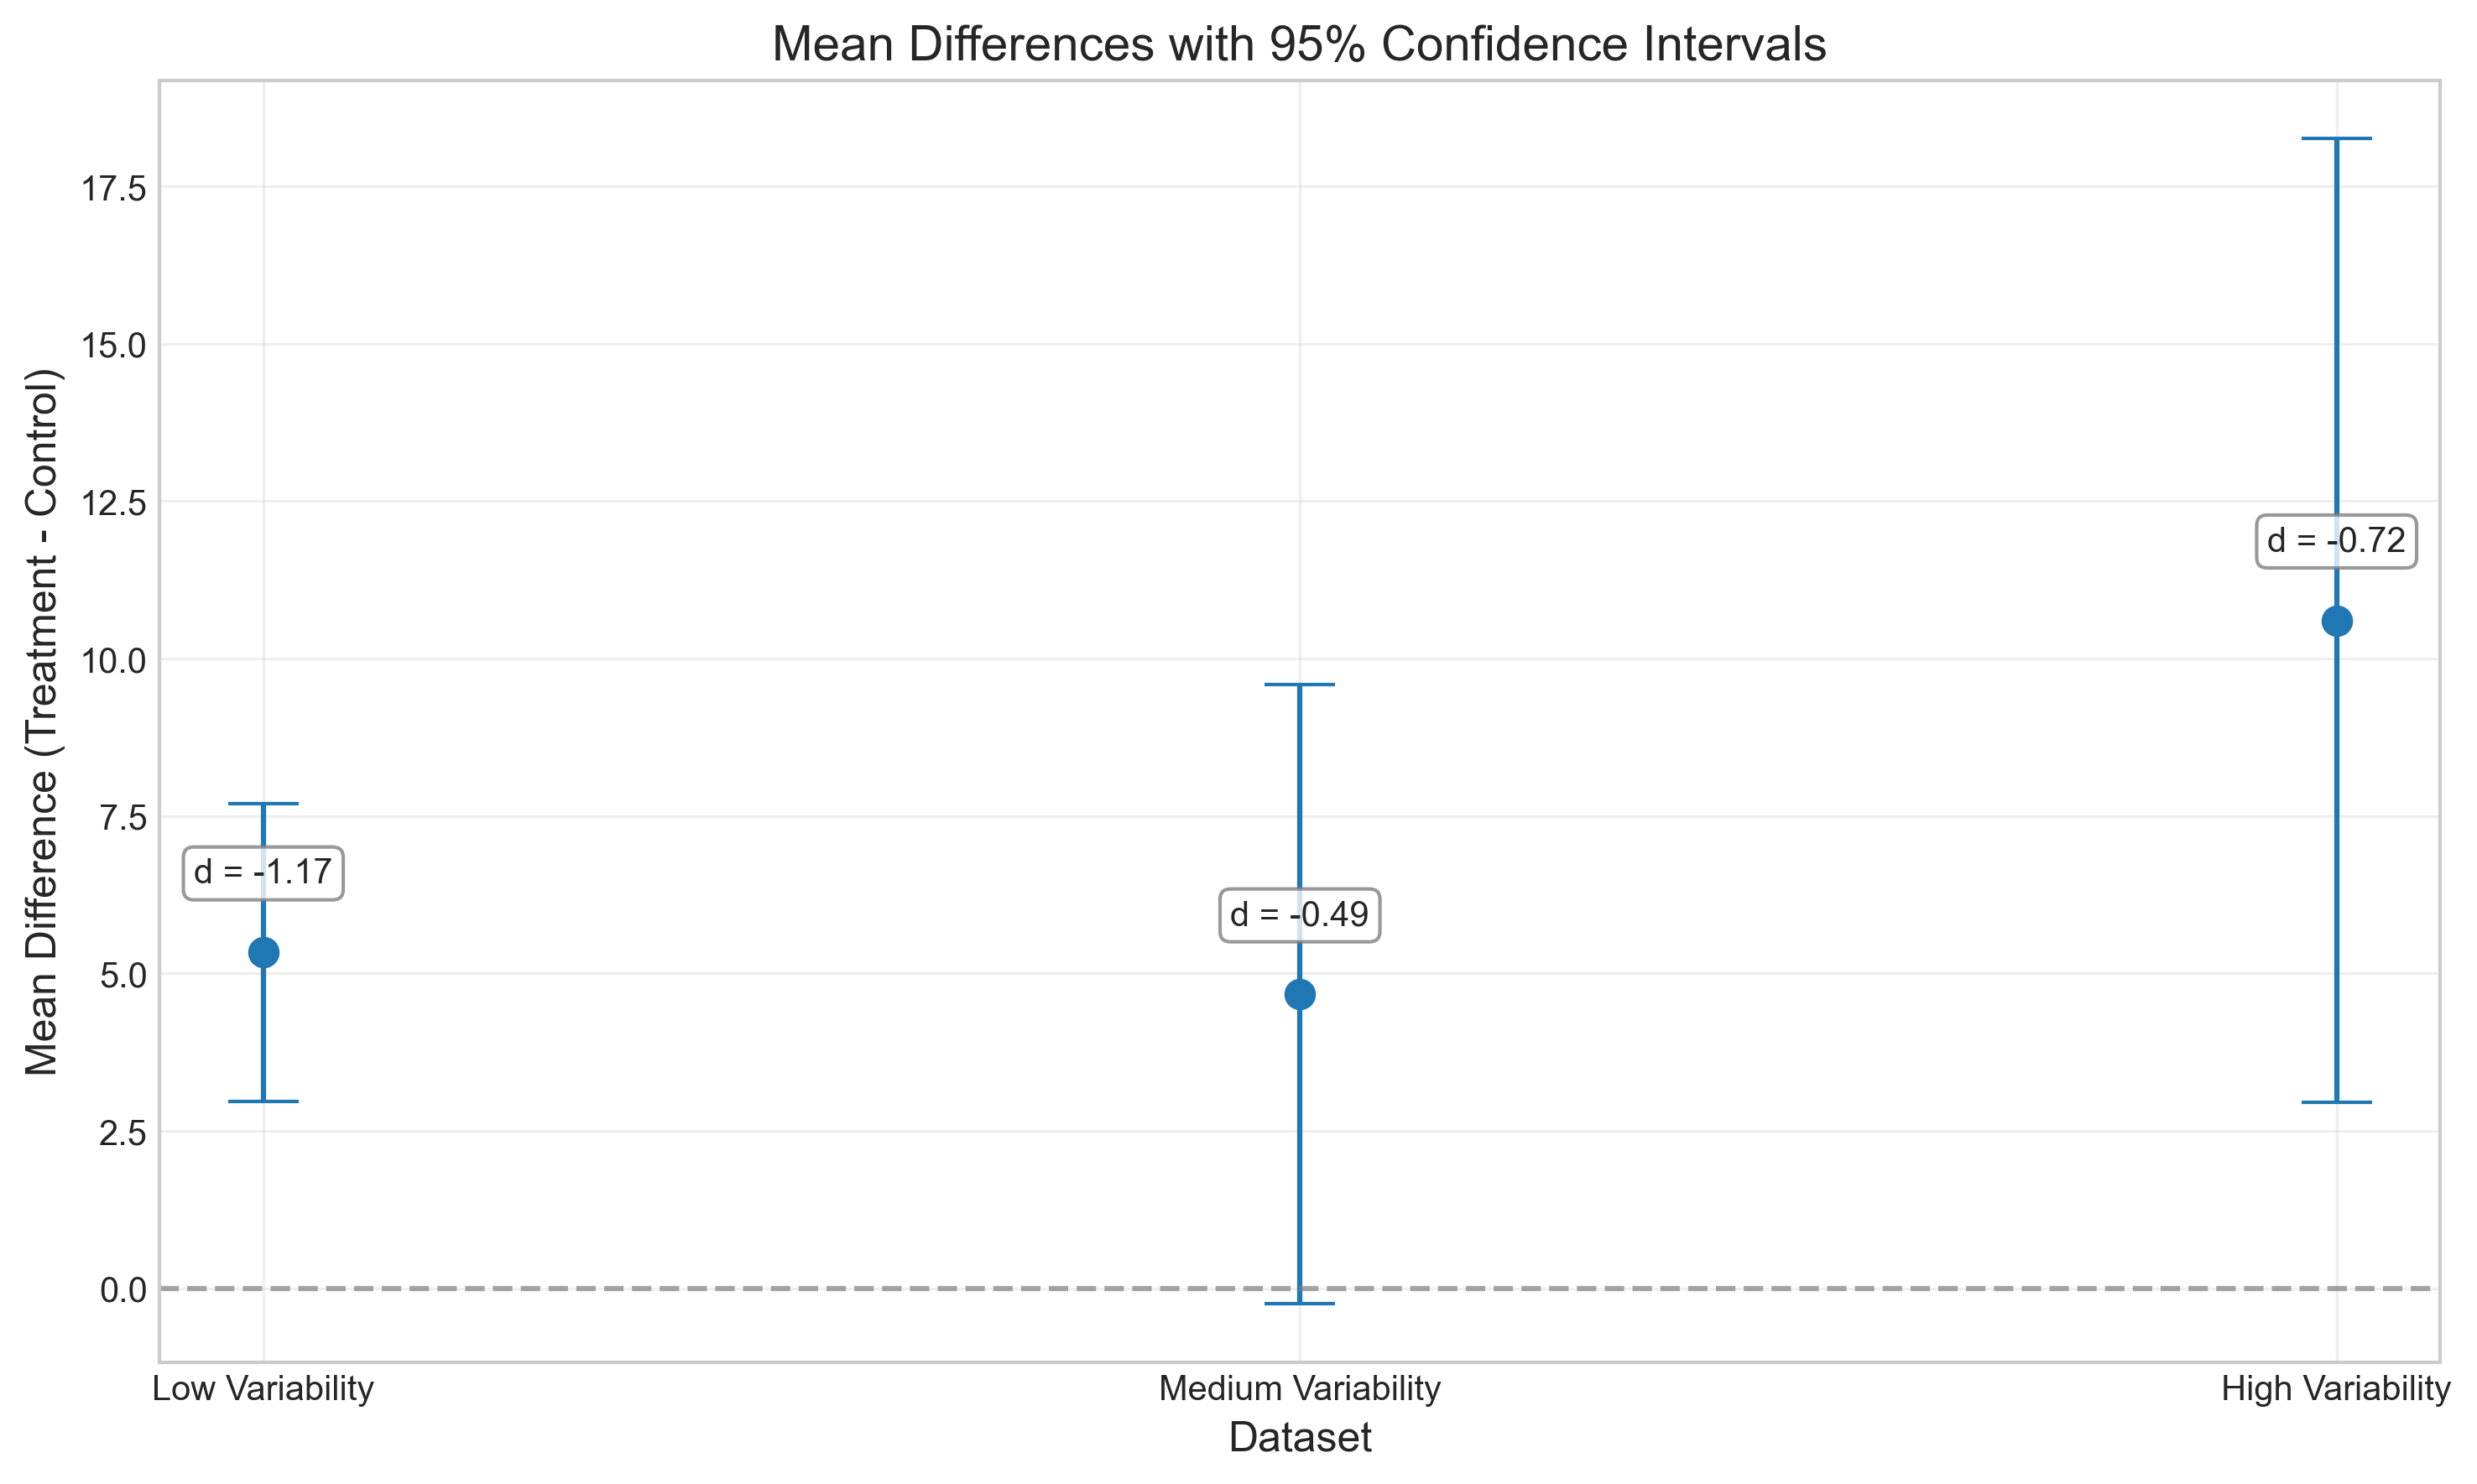

In [16]:
# Demonstrate effect sizes and confidence intervals
np.random.seed(42)

# Generate three datasets with the same mean difference but different variability
control_1 = np.random.normal(100, 5, 30)   # Low variability
treatment_1 = np.random.normal(105, 5, 30)

control_2 = np.random.normal(100, 10, 30)  # Medium variability
treatment_2 = np.random.normal(105, 10, 30)

control_3 = np.random.normal(100, 15, 30)  # High variability
treatment_3 = np.random.normal(105, 15, 30)

# Calculate effect sizes and confidence intervals
def analyze_data(control, treatment):
    # t-test
    t_stat, p_val = stats.ttest_ind(control, treatment)
    
    # Effect size (Cohen's d)
    d = cohens_d(control, treatment)
    
    # Mean difference
    mean_diff = np.mean(treatment) - np.mean(control)
    
    # Standard error of the difference
    se = np.sqrt(np.var(control, ddof=1)/len(control) + np.var(treatment, ddof=1)/len(treatment))
    
    # 95% confidence interval for the mean difference
    df = len(control) + len(treatment) - 2
    ci_lower = mean_diff - stats.t.ppf(0.975, df) * se
    ci_upper = mean_diff + stats.t.ppf(0.975, df) * se
    
    return {
        't-statistic': t_stat,
        'p-value': p_val,
        "Cohen's d": d,
        'Mean Difference': mean_diff,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper
    }

results_1 = analyze_data(control_1, treatment_1)
results_2 = analyze_data(control_2, treatment_2)
results_3 = analyze_data(control_3, treatment_3)

# Create a DataFrame to compare results
comparison = pd.DataFrame({
    'Low Variability (SD=5)': results_1,
    'Medium Variability (SD=10)': results_2,
    'High Variability (SD=15)': results_3
}).T

# Style and display the table
styled_comparison = comparison.style.format({
    't-statistic': '{:.2f}',
    'p-value': '{:.4f}',
    "Cohen's d": '{:.2f}',
    'Mean Difference': '{:.2f}',
    '95% CI Lower': '{:.2f}',
    '95% CI Upper': '{:.2f}'
}).set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]}
]).set_caption('Comparison of Effect Sizes and Confidence Intervals')

display(styled_comparison)

# Visualize the confidence intervals
plt.figure(figsize=(10, 6))

datasets = ['Low Variability', 'Medium Variability', 'High Variability']
mean_diffs = [results_1['Mean Difference'], results_2['Mean Difference'], results_3['Mean Difference']]
ci_lowers = [results_1['95% CI Lower'], results_2['95% CI Lower'], results_3['95% CI Lower']]
ci_uppers = [results_1['95% CI Upper'], results_2['95% CI Upper'], results_3['95% CI Upper']]
effect_sizes = [results_1["Cohen's d"], results_2["Cohen's d"], results_3["Cohen's d"]]

# Plot mean differences with error bars for CIs
plt.errorbar(datasets, mean_diffs, 
             yerr=[np.array(mean_diffs) - np.array(ci_lowers), 
                   np.array(ci_uppers) - np.array(mean_diffs)],
             fmt='o', capsize=10, markersize=8, color='#1f77b4')

# Add reference line at 0
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Add effect size annotations
for i, (d, y) in enumerate(zip(effect_sizes, mean_diffs)):
    plt.annotate(f"d = {d:.2f}", 
                xy=(i, y), 
                xytext=(i, y + 1),
                ha='center', va='bottom',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Mean Difference (Treatment - Control)', fontsize=12)
plt.title('Mean Differences with 95% Confidence Intervals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Bayesian Hypothesis Testing

Bayesian statistics offers an alternative approach to hypothesis testing that addresses many limitations of NHST:

- Instead of p-values, Bayesian analysis calculates the **Bayes factor**, which quantifies the evidence for one hypothesis over another
- Allows researchers to quantify evidence in favor of the null hypothesis (not just against it)
- Incorporates prior knowledge and updates beliefs as new data is collected
- Not affected by stopping rules or intentions regarding sample size

Let's compare traditional NHST with a Bayesian approach:

In [17]:
# Simple demonstration of Bayesian vs. Frequentist approach
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate data: comparing two groups
group_a = np.random.normal(100, 15, 25)  # Mean = 100, SD = 15, n = 25
group_b = np.random.normal(110, 15, 25)  # Mean = 110, SD = 15, n = 25

# Frequentist approach: t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

# Calculate effect size (Cohen's d)
effect_size = (np.mean(group_b) - np.mean(group_a)) / np.sqrt(
    ((len(group_a) - 1) * np.var(group_a, ddof=1) + 
     (len(group_b) - 1) * np.var(group_b, ddof=1)) / 
    (len(group_a) + len(group_b) - 2)
)

# Calculate standard error for the effect size
se = np.sqrt((len(group_a) + len(group_b)) / (len(group_a) * len(group_b)) + 
            (effect_size**2) / (2 * (len(group_a) + len(group_b))))

# Bayesian approach: calculate Bayes factor
# For simplicity, we'll use a function that approximates the Bayes factor
# from the t-statistic and sample sizes
def bf10_from_t(t, n1, n2):
    """Approximate Bayes Factor (BF10) from t-statistic
    Based on Rouder et al. (2009) with default prior"""
    df = n1 + n2 - 2
    r = t / np.sqrt(t**2 + df)
    # This is a simplified approximation
    bf10 = np.exp(0.5 * (t**2 - np.log(df)))
    return bf10

bayes_factor = bf10_from_t(t_stat, len(group_a), len(group_b))

# Function to interpret Bayes factor
def interpret_bf(bf):
    if bf > 100:
        return "Extreme evidence for H₁"
    elif bf > 30:
        return "Very strong evidence for H₁"
    elif bf > 10:
        return "Strong evidence for H₁"
    elif bf > 3:
        return "Moderate evidence for H₁"
    elif bf > 1:
        return "Anecdotal evidence for H₁"
    elif bf == 1:
        return "No evidence"
    elif bf > 1/3:
        return "Anecdotal evidence for H₀"
    elif bf > 1/10:
        return "Moderate evidence for H₀"
    elif bf > 1/30:
        return "Strong evidence for H₀"
    elif bf > 1/100:
        return "Very strong evidence for H₀"
    else:
        return "Extreme evidence for H₀"

# Create a comparison table
comparison_data = {
    'Approach': ['Frequentist (NHST)', 'Bayesian'],
    'Test Statistic': [f't = {t_stat:.2f}', f'BF₁₀ = {bayes_factor:.2f}'],
    'p-value / Posterior Probability': [f'p = {p_value:.4f}', 'N/A'],
    'Interpretation': [
        f"{'Reject' if p_value < 0.05 else 'Fail to reject'} H₀ at α = 0.05",
        interpret_bf(bayes_factor)
    ],
    'Strength of Evidence': [
        'Cannot quantify evidence for H₀',
        f'BF₁₀ = {bayes_factor:.2f} means the data are {bayes_factor:.1f} times more likely under H₁ than H₀'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Style and display the table
styled_comparison = comparison_df.style.set_properties(**{
    'text-align': 'left',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]}
]).set_caption('Comparison of Frequentist and Bayesian Approaches')

display(styled_comparison)

# Visualize the Bayesian updating process
def plot_bayesian_updating(observed_effect, se):
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Define the effect size range
    effect_sizes = np.linspace(-1.5, 1.5, 1000)
    
    # Prior distribution (centered at 0, relatively flat)
    prior = stats.norm.pdf(effect_sizes, 0, 0.5)
    
    # Likelihood function based on our data
    likelihood = stats.norm.pdf(effect_sizes, observed_effect, se)
    
    # Calculate posterior (unnormalized)
    posterior_unnorm = prior * likelihood
    
    # Normalize the posterior
    posterior = posterior_unnorm / np.trapz(posterior_unnorm, effect_sizes)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(effect_sizes, prior, 'b--', label='Prior')
    plt.plot(effect_sizes, likelihood, 'r-.', label='Likelihood')
    plt.plot(effect_sizes, posterior, 'g-', label='Posterior')
    
    # Add vertical lines for key values
    plt.axvline(x=0, color='gray', linestyle=':', alpha=0.7, label='Null hypothesis (d=0)')
    plt.axvline(x=observed_effect, color='red', linestyle=':', alpha=0.7, 
                label=f'Observed effect (d={observed_effect:.2f})')
    
    # Calculate 95% credible interval
    cum_posterior = np.cumsum(posterior) / np.sum(posterior)
    lower_idx = np.where(cum_posterior >= 0.025)[0][0]
    upper_idx = np.where(cum_posterior >= 0.975)[0][0]
    credible_lower = effect_sizes[lower_idx]
    credible_upper = effect_sizes[upper_idx]
    
    # Shade the 95% credible interval
    mask = (effect_sizes >= credible_lower) & (effect_sizes <= credible_upper)
    plt.fill_between(effect_sizes, 0, posterior, where=mask, color='green', alpha=0.2,
                    label=f'95% Credible Interval\n({credible_lower:.2f}, {credible_upper:.2f})')
    
    # Calculate probability that effect is greater than zero
    p_greater_than_zero = np.sum(posterior[effect_sizes > 0]) / np.sum(posterior)
    
    # Add annotations
    plt.title('Bayesian Analysis of Effect Size', fontsize=14)
    plt.xlabel('Effect Size (Cohen\'s d)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Add text annotation for probability
    plt.text(0.05, 0.95, f'P(d > 0 | data) = {p_greater_than_zero:.3f}',
            transform=plt.gca().transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Run the Bayesian updating visualization with our effect size and standard error
plot_bayesian_updating(effect_size, se)

<Figure size 3600x1800 with 0 Axes>

### 4.1 Common Mistakes in Hypothesis Testing

Researchers should be aware of common pitfalls in hypothesis testing:

1. **p-hacking**: Running multiple analyses until finding a significant result
2. **HARKing** (Hypothesizing After Results are Known): Presenting post-hoc hypotheses as if they were a priori
3. **Multiple comparisons problem**: Failing to adjust significance levels when conducting multiple tests
4. **Low statistical power**: Using sample sizes too small to detect meaningful effects
5. **Misinterpreting non-significant results**: Treating failure to reject H₀ as proof that H₀ is true
6. **Publication bias**: The tendency for significant results to be published more often than non-significant ones

Let's visualize how p-hacking can lead to false positives:

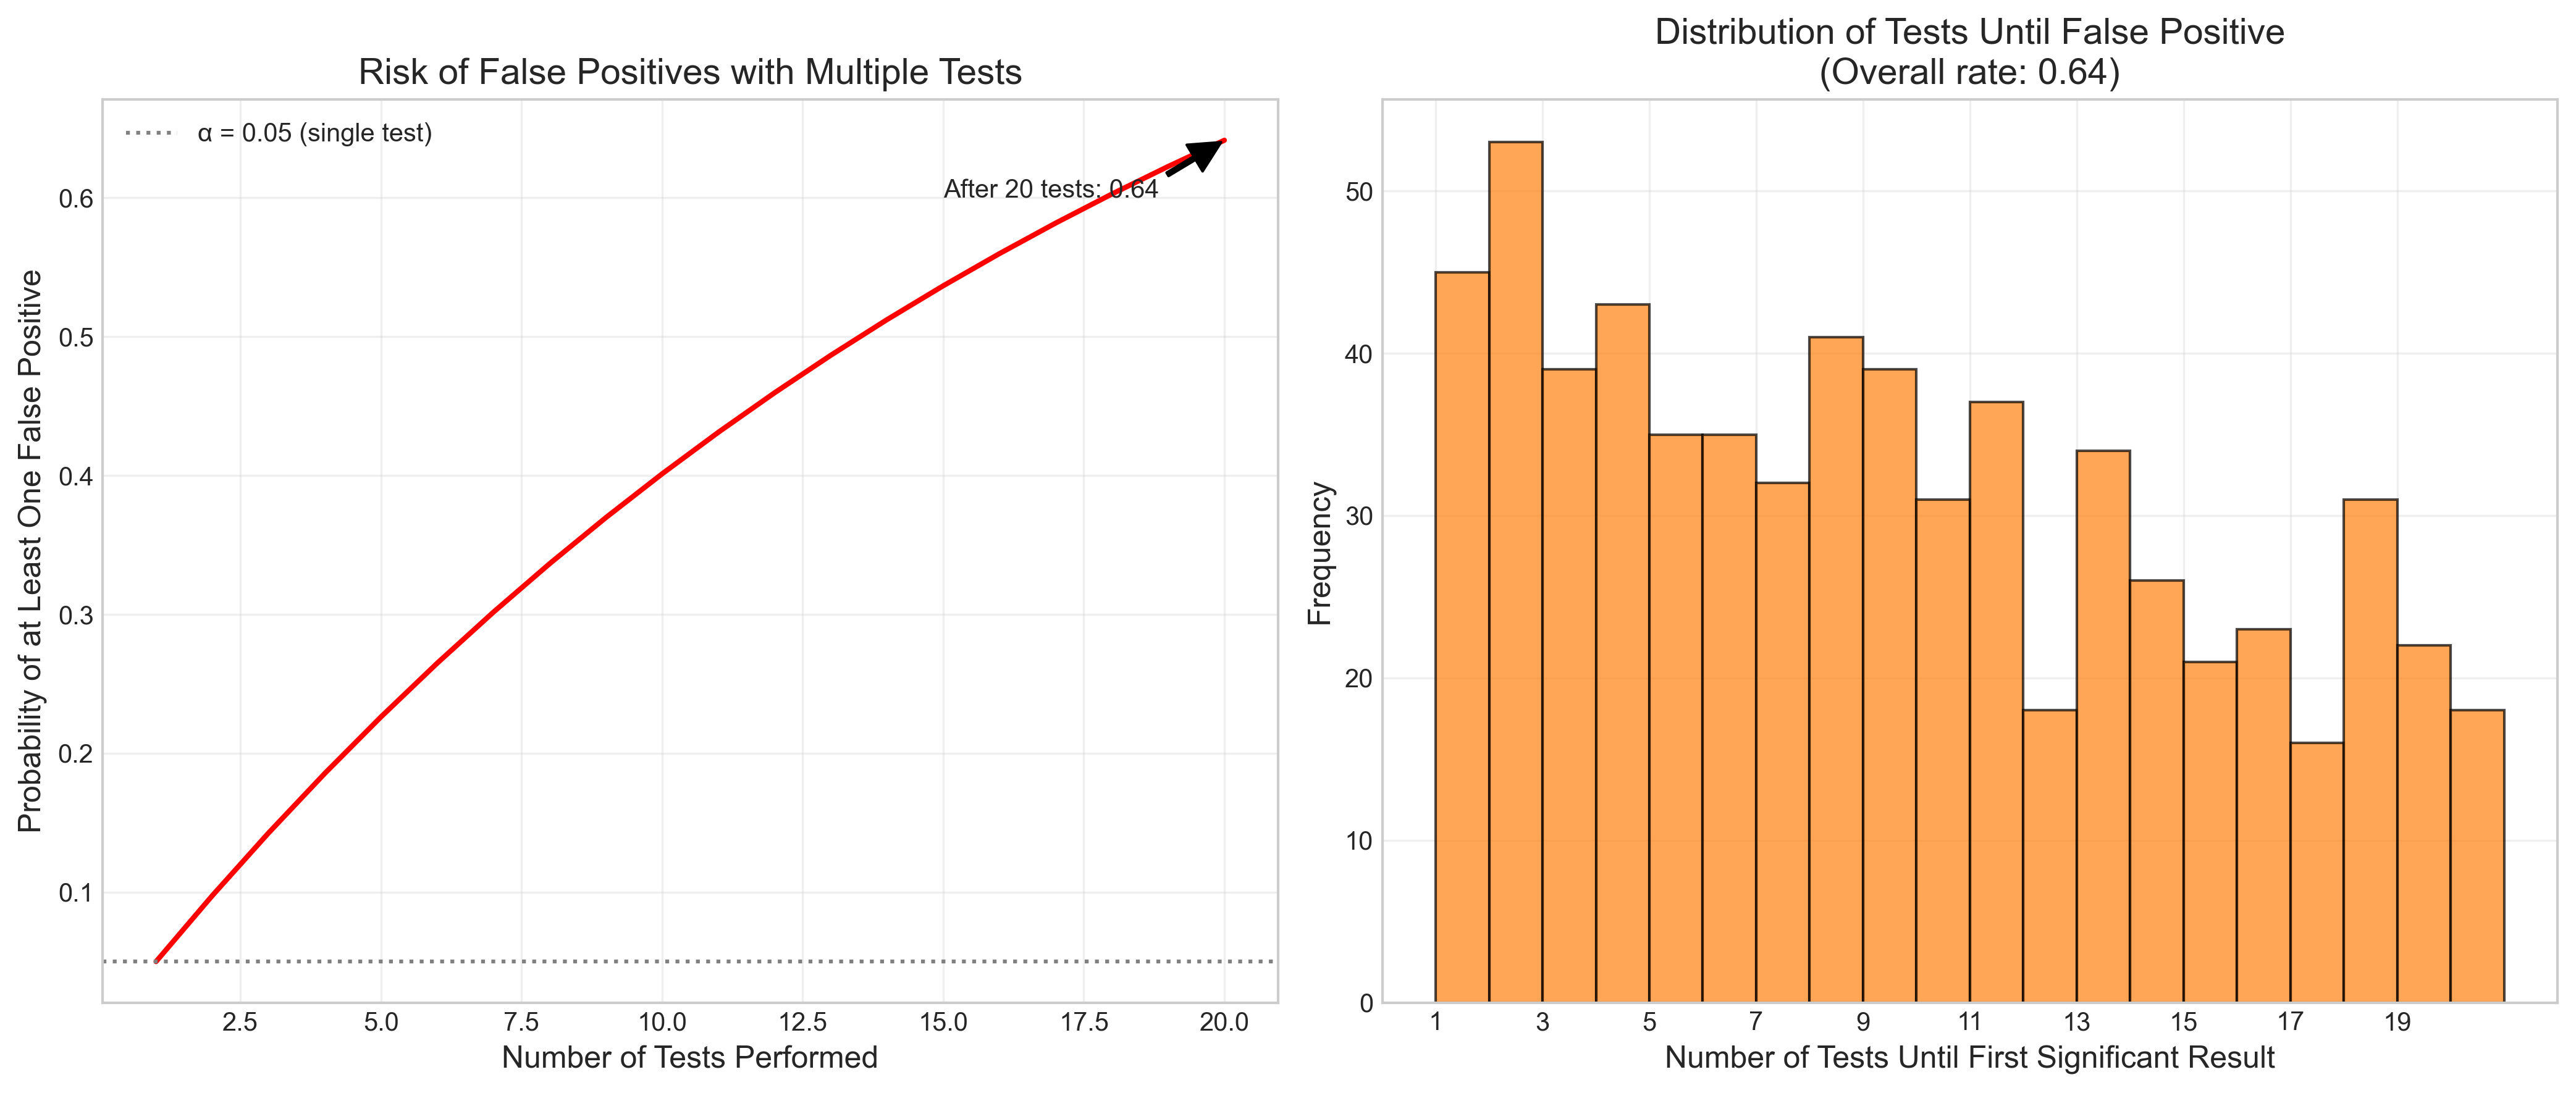

In [18]:
def p_hacking_simulation():
    # Set up the simulation
    np.random.seed(123)
    n_simulations = 1000
    n_tests_per_sim = 20
    alpha = 0.05
    
    # Arrays to store results
    found_significance = np.zeros(n_simulations)
    tests_until_significance = np.zeros(n_simulations)
    
    # Run simulations
    for i in range(n_simulations):
        # For each simulation, run multiple tests until finding significance or exhausting tests
        for j in range(n_tests_per_sim):
            # Generate two random samples (no true effect)
            group1 = np.random.normal(0, 1, 30)
            group2 = np.random.normal(0, 1, 30)
            
            # Perform t-test
            _, p_value = stats.ttest_ind(group1, group2)
            
            # Check if significant
            if p_value < alpha:
                found_significance[i] = 1
                tests_until_significance[i] = j + 1
                break
            elif j == n_tests_per_sim - 1:
                # If we've exhausted all tests without finding significance
                tests_until_significance[i] = n_tests_per_sim
    
    # Calculate probability of finding at least one significant result
    prob_significant = np.mean(found_significance)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Probability of false positive as function of number of tests
    tests = np.arange(1, n_tests_per_sim + 1)
    false_positive_prob = 1 - (1 - alpha) ** tests
    
    ax1.plot(tests, false_positive_prob, 'r-', linewidth=2)
    ax1.axhline(y=0.05, color='gray', linestyle=':', label='α = 0.05 (single test)')
    ax1.set_xlabel('Number of Tests Performed', fontsize=12)
    ax1.set_ylabel('Probability of at Least One False Positive', fontsize=12)
    ax1.set_title('Risk of False Positives with Multiple Tests', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Annotate the probability after 20 tests
    ax1.annotate(f'After 20 tests: {false_positive_prob[-1]:.2f}',
                xy=(20, false_positive_prob[-1]), xytext=(15, 0.6),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    # Plot 2: Distribution of tests until significance
    # Only include simulations where significance was found
    significant_tests = tests_until_significance[found_significance == 1]
    
    if len(significant_tests) > 0:  # Check if any simulations found significance
        ax2.hist(significant_tests, bins=range(1, n_tests_per_sim + 2), 
                alpha=0.7, color='#ff7f0e', edgecolor='black')
        ax2.set_xlabel('Number of Tests Until First Significant Result', fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.set_title(f'Distribution of Tests Until False Positive\n(Overall rate: {prob_significant:.2f})', 
                     fontsize=14)
        ax2.set_xticks(range(1, n_tests_per_sim + 1, 2))
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run the simulation
p_hacking_simulation()

### 4.2 Multiple Comparisons Corrections

When conducting multiple statistical tests, the probability of making at least one Type I error increases. Several methods exist to correct for this problem:

1. **Bonferroni correction**: Divide the significance level (α) by the number of tests
2. **Holm-Bonferroni method**: A step-down procedure that offers more power than Bonferroni
3. **False Discovery Rate (FDR) control**: Controls the expected proportion of false positives
4. **Family-wise error rate (FWER) control**: Controls the probability of making at least one Type I error

Let's demonstrate how these corrections work with a simulated example:

In [19]:
# Simulate multiple comparisons scenario
np.random.seed(42)

# Simulate a study comparing 10 outcome measures between two groups
# Only one measure has a true effect
n_measures = 10
n_per_group = 30
alpha = 0.05

# Generate data
group1_data = np.random.normal(0, 1, (n_per_group, n_measures))
group2_data = np.random.normal(0, 1, (n_per_group, n_measures))

# Add a true effect to the first measure (d = 0.8)
group2_data[:, 0] += 0.8

# Perform t-tests for each measure
p_values = []
t_values = []
effect_sizes = []

for i in range(n_measures):
    t_stat, p_val = stats.ttest_ind(group1_data[:, i], group2_data[:, i])
    p_values.append(p_val)
    t_values.append(t_stat)
    effect_sizes.append(cohens_d(group1_data[:, i], group2_data[:, i]))

# Convert to numpy arrays
p_values = np.array(p_values)
t_values = np.array(t_values)
effect_sizes = np.array(effect_sizes)

# Apply different correction methods
# 1. Bonferroni correction
bonferroni_threshold = alpha / n_measures
bonferroni_significant = p_values < bonferroni_threshold

# 2. Holm-Bonferroni method
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
holm_thresholds = alpha / (n_measures - np.arange(n_measures))

holm_significant = np.zeros(n_measures, dtype=bool)
for i in range(n_measures):
    if i > 0 and sorted_p_values[i-1] > holm_thresholds[i-1]:
        break
    holm_significant[sorted_indices[i]] = sorted_p_values[i] < holm_thresholds[i]

# 3. False Discovery Rate (Benjamini-Hochberg procedure)
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
ranks = np.arange(1, n_measures + 1)
fdr_thresholds = alpha * ranks / n_measures

# Find the largest k such that P(k) ≤ (k/m)α
fdr_significant = np.zeros(n_measures, dtype=bool)
for i in range(n_measures-1, -1, -1):
    if sorted_p_values[i] <= fdr_thresholds[i]:
        fdr_significant[sorted_indices[:i+1]] = True
        break

# Create a results table
results_data = {
    'Measure': [f'Measure {i+1}' for i in range(n_measures)],
    't-value': np.round(t_values, 2),
    'p-value': np.round(p_values, 4),
    'Effect Size (d)': np.round(effect_sizes, 2),
    'Uncorrected (α=0.05)': p_values < alpha,
    f'Bonferroni (α={bonferroni_threshold:.4f})': bonferroni_significant,
    'Holm-Bonferroni': holm_significant,
    'FDR (Benjamini-Hochberg)': fdr_significant,
    'True Effect?': [i == 0 for i in range(n_measures)]
}

results_df = pd.DataFrame(results_data)

# Style the table
def highlight_true_effect(val):
    color = '#d4edda' if val else ''
    return f'background-color: {color}'

def highlight_significant(val):
    color = '#cce5ff' if val else ''
    return f'background-color: {color}'

styled_results = results_df.style.applymap(highlight_true_effect, subset=['True Effect?'])
for col in ['Uncorrected (α=0.05)', f'Bonferroni (α={bonferroni_threshold:.4f})', 
            'Holm-Bonferroni', 'FDR (Benjamini-Hochberg)']:
    styled_results = styled_results.applymap(highlight_significant, subset=[col])

styled_results = styled_results.set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Multiple Comparisons Correction Methods')

display(styled_results)

## 5. Beyond p-values: Modern Approaches to Statistical Inference

While null hypothesis significance testing (NHST) has been the dominant approach in psychology, there are several alternative and complementary approaches that address some of its limitations:

### 5.1 Effect Sizes and Confidence Intervals

Reporting effect sizes and their confidence intervals provides more information than p-values alone:

- **Effect sizes** quantify the magnitude of an effect, independent of sample size
- **Confidence intervals** indicate the precision of our estimates

Common effect size measures in psychology:
- Cohen's d (standardized mean difference)
- Pearson's r (correlation)
- Odds ratio (for categorical data)
- η² (eta-squared) and partial η² (for ANOVA)

### 5.2 Meta-analysis

Meta-analysis combines results from multiple studies to provide more robust estimates of effects:

- Increases statistical power
- Provides more precise effect size estimates
- Can identify moderators of effects
- Helps address publication bias

### 5.3 Replication and Open Science

The replication crisis in psychology has led to several methodological reforms:

- **Pre-registration**: Documenting hypotheses and analysis plans before data collection
- **Registered Reports**: Peer review of methods before data collection
- **Open data and code**: Sharing data and analysis scripts
- **Replication studies**: Systematically repeating previous studies

### 5.4 Bayesian Inference

Bayesian approaches offer several advantages over traditional NHST:

- Incorporate prior knowledge
- Provide direct probability statements about hypotheses
- Allow for evidence in favor of the null hypothesis
- Not affected by optional stopping or multiple comparisons in the same way as NHST

Let's compare traditional and Bayesian approaches to hypothesis testing:

In [20]:
def compare_approaches():
    # Create a comparison table
    comparison_data = {
        'Aspect': [
            'Basic Question',
            'Probability Interpretation',
            'Prior Information',
            'Evidence for H₀',
            'Multiple Testing',
            'Stopping Rules',
            'Interpretation',
            'Software Availability'
        ],
        'Frequentist (NHST)': [
            'How likely is the data, given H₀?',
            'Long-run frequency of events',
            'Not formally incorporated',
            'Cannot provide evidence for H₀',
            'Requires correction',
            'Must be fixed in advance',
            'Often misinterpreted',
            'Widely available'
        ],
        'Bayesian': [
            'How likely is H₁ vs H₀, given the data?',
            'Degree of belief',
            'Explicitly modeled as priors',
            'Can quantify evidence for H₀',
            'No formal correction needed',
            'Can collect until evidence is sufficient',
            'More intuitive',
            'Increasingly available'
        ]
    }
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Style the table
    styled_comparison = comparison_df.style.set_properties(**{
        'text-align': 'left',
        'font-size': '11pt',
        'border': '1px solid gray',
        'padding': '8px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                    ('background-color', '#f0f0f0')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
    ]).set_caption('Comparison of Frequentist and Bayesian Approaches')
    
    display(styled_comparison)

# Display the comparison
compare_approaches()

## 6. Practical Guidelines for Hypothesis Testing in Psychology

Based on current best practices, here are some guidelines for conducting and reporting hypothesis tests in psychological research:

### 6.1 Planning Your Analysis

1. **Determine your hypotheses clearly** before data collection
2. **Conduct a power analysis** to determine appropriate sample size
3. **Pre-register** your study design, hypotheses, and analysis plan
4. **Plan for multiple comparisons** if testing multiple hypotheses
5. **Consider Bayesian analyses** as a complement to traditional methods

### 6.2 Conducting Your Analysis

1. **Check assumptions** of your statistical tests
2. **Use appropriate corrections** for multiple comparisons
3. **Calculate effect sizes** in addition to p-values
4. **Compute confidence intervals** for parameter estimates
5. **Consider sensitivity analyses** to check robustness of findings

### 6.3 Reporting Your Results

1. **Report exact p-values** rather than just "significant" or "non-significant"
2. **Include effect sizes and confidence intervals**
3. **Acknowledge limitations** of your study
4. **Be transparent** about all analyses conducted
5. **Share data and code** when possible

### 6.4 Interpreting Your Results

1. **Consider practical significance**, not just statistical significance
2. **Interpret confidence intervals**, not just point estimates
3. **Avoid overinterpreting** marginally significant results
4. **Consider alternative explanations** for your findings
5. **Place results in context** of existing literature

Let's create a checklist for good statistical practice in psychological research:

In [21]:
def create_checklist():
    # Create a checklist table
    checklist_data = {
        'Stage': [
            'Planning', 'Planning', 'Planning', 'Planning', 'Planning',
            'Analysis', 'Analysis', 'Analysis', 'Analysis', 'Analysis',
            'Reporting', 'Reporting', 'Reporting', 'Reporting', 'Reporting',
            'Interpretation', 'Interpretation', 'Interpretation', 'Interpretation', 'Interpretation'
        ],
        'Task': [
            'Define clear, testable hypotheses',
            'Conduct a priori power analysis',
            'Pre-register study design and analysis plan',
            'Specify primary and secondary outcomes',
            'Plan for multiple comparisons',
            'Check statistical assumptions',
            'Use appropriate statistical tests',
            'Apply corrections for multiple comparisons',
            'Calculate effect sizes',
            'Compute confidence intervals',
            'Report exact p-values',
            'Include effect sizes and confidence intervals',
            'Describe all analyses conducted',
            'Acknowledge limitations',
            'Share data and analysis code',
            'Consider practical significance',
            'Avoid dichotomous thinking (significant vs. non-significant)',
            'Consider alternative explanations',
            'Place results in context of existing literature',
            'Suggest directions for future research'
        ],
        'Importance': [
            'Essential', 'Essential', 'Recommended', 'Essential', 'Essential',
            'Essential', 'Essential', 'Essential', 'Essential', 'Essential',
            'Essential', 'Essential', 'Essential', 'Essential', 'Recommended',
            'Essential', 'Essential', 'Essential', 'Essential', 'Recommended'
        ]
    }
    
    checklist_df = pd.DataFrame(checklist_data)
    
    # Style the table
    def highlight_importance(val):
        if val == 'Essential':
            return 'background-color: #d4edda'
        elif val == 'Recommended':
            return 'background-color: #fff3cd'
        return ''
    
    def highlight_stage(val):
        colors = {
            'Planning': '#e6f7ff',
            'Analysis': '#e6ffe6',
            'Reporting': '#fff2e6',
            'Interpretation': '#f7e6ff'
        }
        return f'background-color: {colors.get(val, "")}'
    
    styled_checklist = checklist_df.style.applymap(highlight_importance, subset=['Importance'])
    styled_checklist = styled_checklist.applymap(highlight_stage, subset=['Stage'])
    
    styled_checklist = styled_checklist.set_properties(**{
        'text-align': 'left',
        'font-size': '11pt',
        'border': '1px solid gray'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                    ('background-color', '#f0f0f0')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
    ]).set_caption('Checklist for Good Statistical Practice in Psychological Research')
    
    display(styled_checklist)

# Display the checklist
create_checklist()

## 7. Summary

In this chapter, we've covered the fundamentals of hypothesis testing in psychological research:

- The logic and process of hypothesis testing
- Understanding p-values, significance levels, and types of errors
- Common statistical tests used in psychology
- Potential pitfalls and biases in hypothesis testing
- The importance of reporting results and interpreting them

We've also explored some advanced topics, including:

- Effect sizes and confidence intervals
- Meta-analysis
- Replication and open science
- Bayesian inference
- Good statistical practice

By the end of this chapter, you should have a solid understanding of the fundamentals of hypothesis testing and how to apply them in psychological research.

In the next chapter, we'll delve into more advanced topics in psychology, such as cognitive psychology, social psychology, and neuroscience.